##This is the notebook that will serve as the first go through of the Pima Native Americans datasets from Kaggle.

<h3>Goals of this project</h3>
- Develop a strong structure to follow, as in a framework so I have the ability to use this a guide for future projects.

- Commit to GitHub so I can track my progress

- Learn how to containerize this later

- Learn how to build this in streamlit

- Foster my intuition on which plots are the best for certain types of data

- Standardize and normalize data quickly

- Feature Engineering ideas

- Deploy to Heroku

- Play with Google Cloud Platform

- Practice modularizing my code to make it easier to use

#Questions

- What kind of data are dealing with - structured or unstructred?
  - Structured data for sure

- Does the data have categorical, numerical, ordinal, or time series data?
  - 

- What are my feature variables (inputs) and what are my target variables (outputs)?

- Are we missing any data?

- Are we dealing with outliers?


#Data Dictionary

* *FYI: Everyone person in this dataset is a woman at age 21 or higher*

| Column | Meaning | Thoughts |
|------- | ------- | -------- |
|Pregnancies | Number of times pregnant | An integer.  What is the min and what is the max?  |
| Glucose | Plasma glucose concentration a 2 hours in an oral glucose tolerance test | Measured in mmol/L?  1 mmol/L = 18 mg/dL.  I need to multiply by 18 to get the measurement for the HOMA IR Score|
|Blood Pressure | Diastolic blood pressure | mm Hg.  Can we figure out the systolic?  The number we are given is the second one -- 120/80 |
|SkinThickness | Triceps skin fold thickness (mm) | This seems kinda normal|
|Insulin | 2 hour serum insuling (muU/ml) | Measured in muU/ml.|
|BMI | Body mass index (weight in kg/(height in meters)<sup>2</sup> | Traditional measurement |
|Diabetes Pedigree | Diabetes Pedigree Function | A function used to determine whether you have diabetes given your family history |
|Age | Age in years| This is a normal whole integer |
|Outcome | Class variable (0 or 1) 268 of 768 are 1, the others are 0|  We have an imbalance so we can handle that but let's start without that|


HOMA - IR Blood Code 
- Insulin * Glucose = HOMA-IR
- Healthy is 0.5 - 1.5
- Less than 1.0 means you are insulin- sensitive, which is optimal
- A range of 1 - 1.9 is within "Normal limits"
- Above 1.9 indicates early insuling resistance
- Above 2.9 indicates significant signal resistance

#Models

What models do I want to use?
  - Random Forrest
  - Lasso
  - SVM
  - Dense network of 2 layers
  - Linear SVC
  - Gradient Boosting


Start with defaults and then try messing with hyperparementers

I will use a handful of architectures and then call all of them "Model 1" and see which does the best

- Model 1
  - No feature engineering, little normalization / standardization

- Model 2
  - Feature engineering to see if it helps

- Model 3
  - Adjust hyperparameters in models

- Model 4
  - A dense network to see how deep learning does

##Import the libraires and then lets get into the data and see what we need to work on

In [ ]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.widgets import Slider, Button, RadioButtons
import plotly as pt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

from sklearn import preprocessing
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import mean_absolute_error, accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing



from google.colab import files
from google.colab import drive
drive.mount("/content/gdrive")

import os
os.chdir("/content/gdrive/My Drive/Startup Projects/Medical (Democratize)/People/Diabetes-Data/Diabetes Prediction/Pima/Data/")

%matplotlib inline

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
diabetes = pd.read_csv("diabetes.csv")
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
def background_check(dataframe):
  print("#" * 100)
  print(dataframe.head())

  print("#" * 100)
  print(dataframe.info())

  print("#" * 100)
  print(dataframe.describe())

  print("#" * 100)
  print(dataframe.tail())

  print("#" * 100)
  print(dataframe.columns)

  print("#" * 100)
  print(dataframe.dtypes)

  print("#" * 100)
  print(dataframe.shape)

background_check(diabetes)

####################################################################################################
   Pregnancies  Glucose  BloodPressure  ...  DiabetesPedigreeFunction  Age  Outcome
0            6      148             72  ...                     0.627   50        1
1            1       85             66  ...                     0.351   31        0
2            8      183             64  ...                     0.672   32        1
3            1       89             66  ...                     0.167   21        0
4            0      137             40  ...                     2.288   33        1

[5 rows x 9 columns]
####################################################################################################
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1 

#Make a few graphs shall we

Types of graphs to make
- Subplot to see
  - Bar
  - Pie
  - Corr
  - Countplot (https://www.kaggle.com/jchen2186/data-visualization-with-python-seaborn")
  - Line (plot)
  - Histogram
  - Scatter
  - Matplotlib.widgets?
  - Seaborn heatmap
  - Distplot

- Plotly
  - How can I do what I have done with plotly



In [ ]:
def subplots_bar():
  '''
  Summary: This function plots three of the columns since the scale is simple

  Description:  The purpose of this function is to easily create bar plots.
                The goal is to make it a big for loop and loop over the necessary columns to make the code simpler and more modular

  Parameters: None

  Return: None, however it makes the charts for us
  '''

  fig, ax = plt.subplots(nrows = 3, figsize = (20, 10))  

  pregnancies = sns.barplot(ax = ax[0], x = diabetes["Pregnancies"], y = diabetes["Outcome"])
  ax[0].set_title("Pregnancies / Outcome")
  pregnancies.set_xticklabels(pregnancies.get_xticklabels())
  pregnancies.tick_params(axis = "x", which = "major")

  skin_thickness = sns.barplot(ax = ax[1], x = diabetes["SkinThickness"], y = diabetes["Outcome"])
  ax[1].set_title("SkinThickness / Outcome")
  skin_thickness.set_xticklabels(skin_thickness.get_xticklabels())
  skin_thickness.tick_params(axis = "x", which = "major")

  age = sns.barplot(ax = ax[2], x = diabetes["Age"], y = diabetes["Outcome"])
  ax[2].set_title("Age / Outcome")
  age.set_xticklabels(age.get_xticklabels())
  age.tick_params(axis = "x", which = "major")

  fig.tight_layout()
  plt.show()

'''
  for row in range(nrows):
    for col in range(ncols):
      sns.barplot(ax = ax[row][col], x = diabetes.loc[diabetes.columns[i]], y = diabetes["Outcome"])
      ax[row][col].set_title(str(column[i]))
      i += 1  


  sns.barplot(ax = ax[0][0], x = diabetes["Pregnancies"], y = diabetes["Outcome"])
  ax[0][0].set_title("Pregnanices")

  sns.barplot(ax = ax[0][1],)
'''

'\n  for row in range(nrows):\n    for col in range(ncols):\n      sns.barplot(ax = ax[row][col], x = diabetes.loc[diabetes.columns[i]], y = diabetes["Outcome"])\n      ax[row][col].set_title(str(column[i]))\n      i += 1  \n\n\n  sns.barplot(ax = ax[0][0], x = diabetes["Pregnancies"], y = diabetes["Outcome"])\n  ax[0][0].set_title("Pregnanices")\n\n  sns.barplot(ax = ax[0][1],)\n'

#Run subplots and make decisions on what it is telling us

- How to read a bar plot 
  - Does the amount of times a woman is pregnant afffect the outcome of having 
diabetes?
    - It kinda looks like it does.  Odd...

  - Does the thickness of someone's skin affect the outcome of having diabetes?
    - It is hard to tell since the snake like structure of the bar

  - Does a woman's age affect the outcome of having diabetes?
    - This is more linear.  We do have some interesting cases where the outcome is 0 and the person is in their 40's

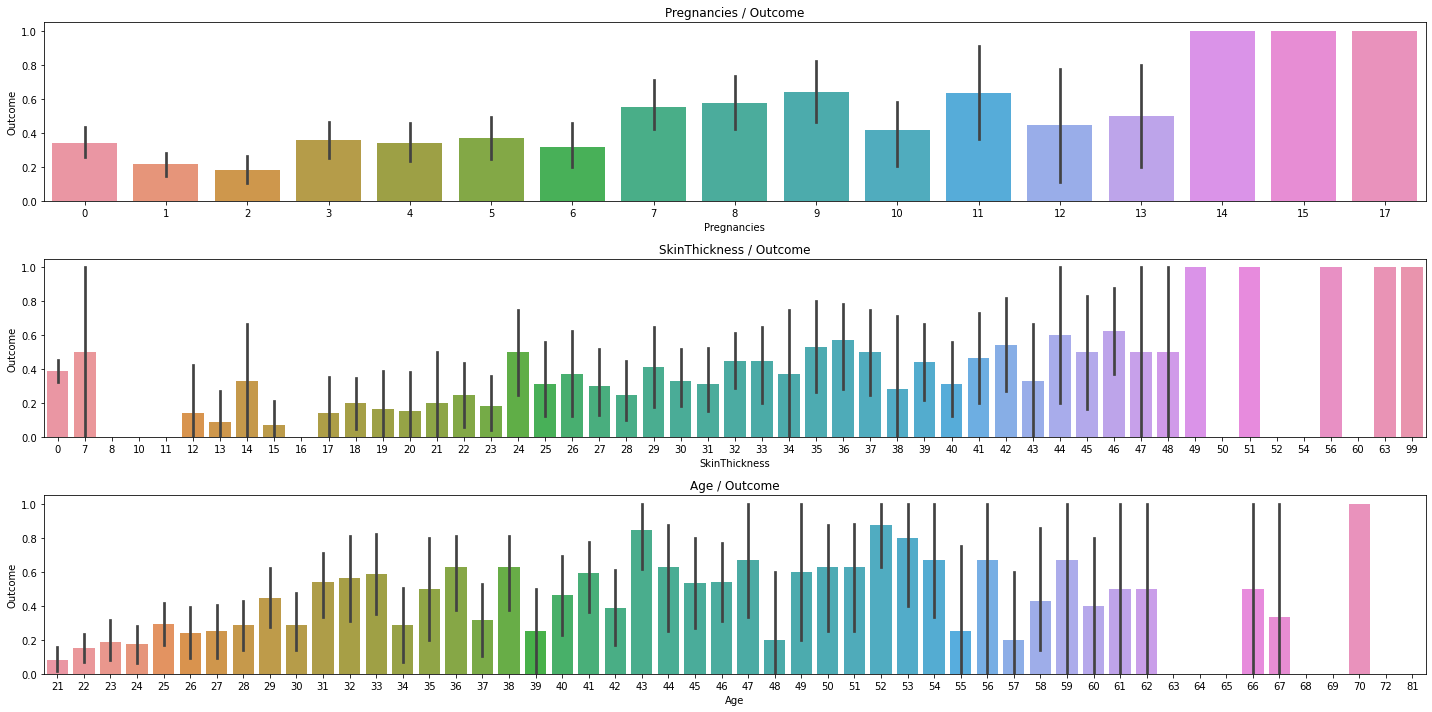

In [ ]:
subplots_bar()

In [ ]:
def subplots_that_are_too_big_bar():
  '''
  Summary: This function plots five of the columns since the scale is simple

  Description:  The purpose of this function is to easily create bar plots.
                The goal is to make it a big for loop and loop over the necessary columns to make the code simpler and more modular

  Parameters: None

  Return: None, however it makes the charts for us
  '''
  fig, ax = plt.subplots(nrows = 4, ncols = 1, figsize = (35, 15))

  glucose = sns.barplot(ax = ax[0], x = diabetes["Glucose"], y = diabetes["Outcome"])
  ax[0].set_title("Glucose / Outcome")
  glucose.tick_params(axis = "x")

  insulin = sns.barplot(ax = ax[1], x = diabetes["Insulin"], y = diabetes["Outcome"])
  ax[1].set_title("Insulin / Outcome")
  insulin.set_xticklabels(insulin.get_xticklabels())
  insulin.tick_params(axis = "x", which = "major")

  bmi = sns.barplot(ax = ax[2], x = diabetes["BMI"], y = diabetes["Outcome"])
  ax[2].set_title("BMI / Outcome")
  bmi.set_xticklabels(bmi.get_xticklabels())
  bmi.tick_params(axis = "x", which = "major")

  blood_pressure = sns.barplot(ax = ax[3], x = diabetes["BloodPressure"], y = diabetes["Outcome"])
  ax[3].set_title("BloodPressure  / Outcome")
  blood_pressure.set_xticklabels(blood_pressure.get_xticklabels())
  blood_pressure.tick_params(axis = "x", which = "major")

  fig.tight_layout()
  plt.show()


#Now run the big suplots and see what we are seeing

- How to read a bar plot
  - Does the glucose level influence the person's likelihood of being a diabetic
    - It definitely appears to go up more as we increase glucose levels.  We will have to standardize.
  - Does insulin level influence the person's likelihood of being a diabetic
    - It is hard to tell with this bar plot since there are so many that say yes and some that say 0.5.
  - Does BMI influence the person's likeihood of being a diabetic?
    - This is also hard to tell.  The numbers too the right seem to say yes and that really makes sense.  A higher bmi says you are heavier which would make sense for a type 2 diabetic.  I may need to standardize
  - Does blood pressure influence the person's likelihood of being a diabetic?
    - This looks like it is telling us the a mid range blood pressure leans towards not being a diabetic, however if you are in the low range or the high range then it seems more likely.

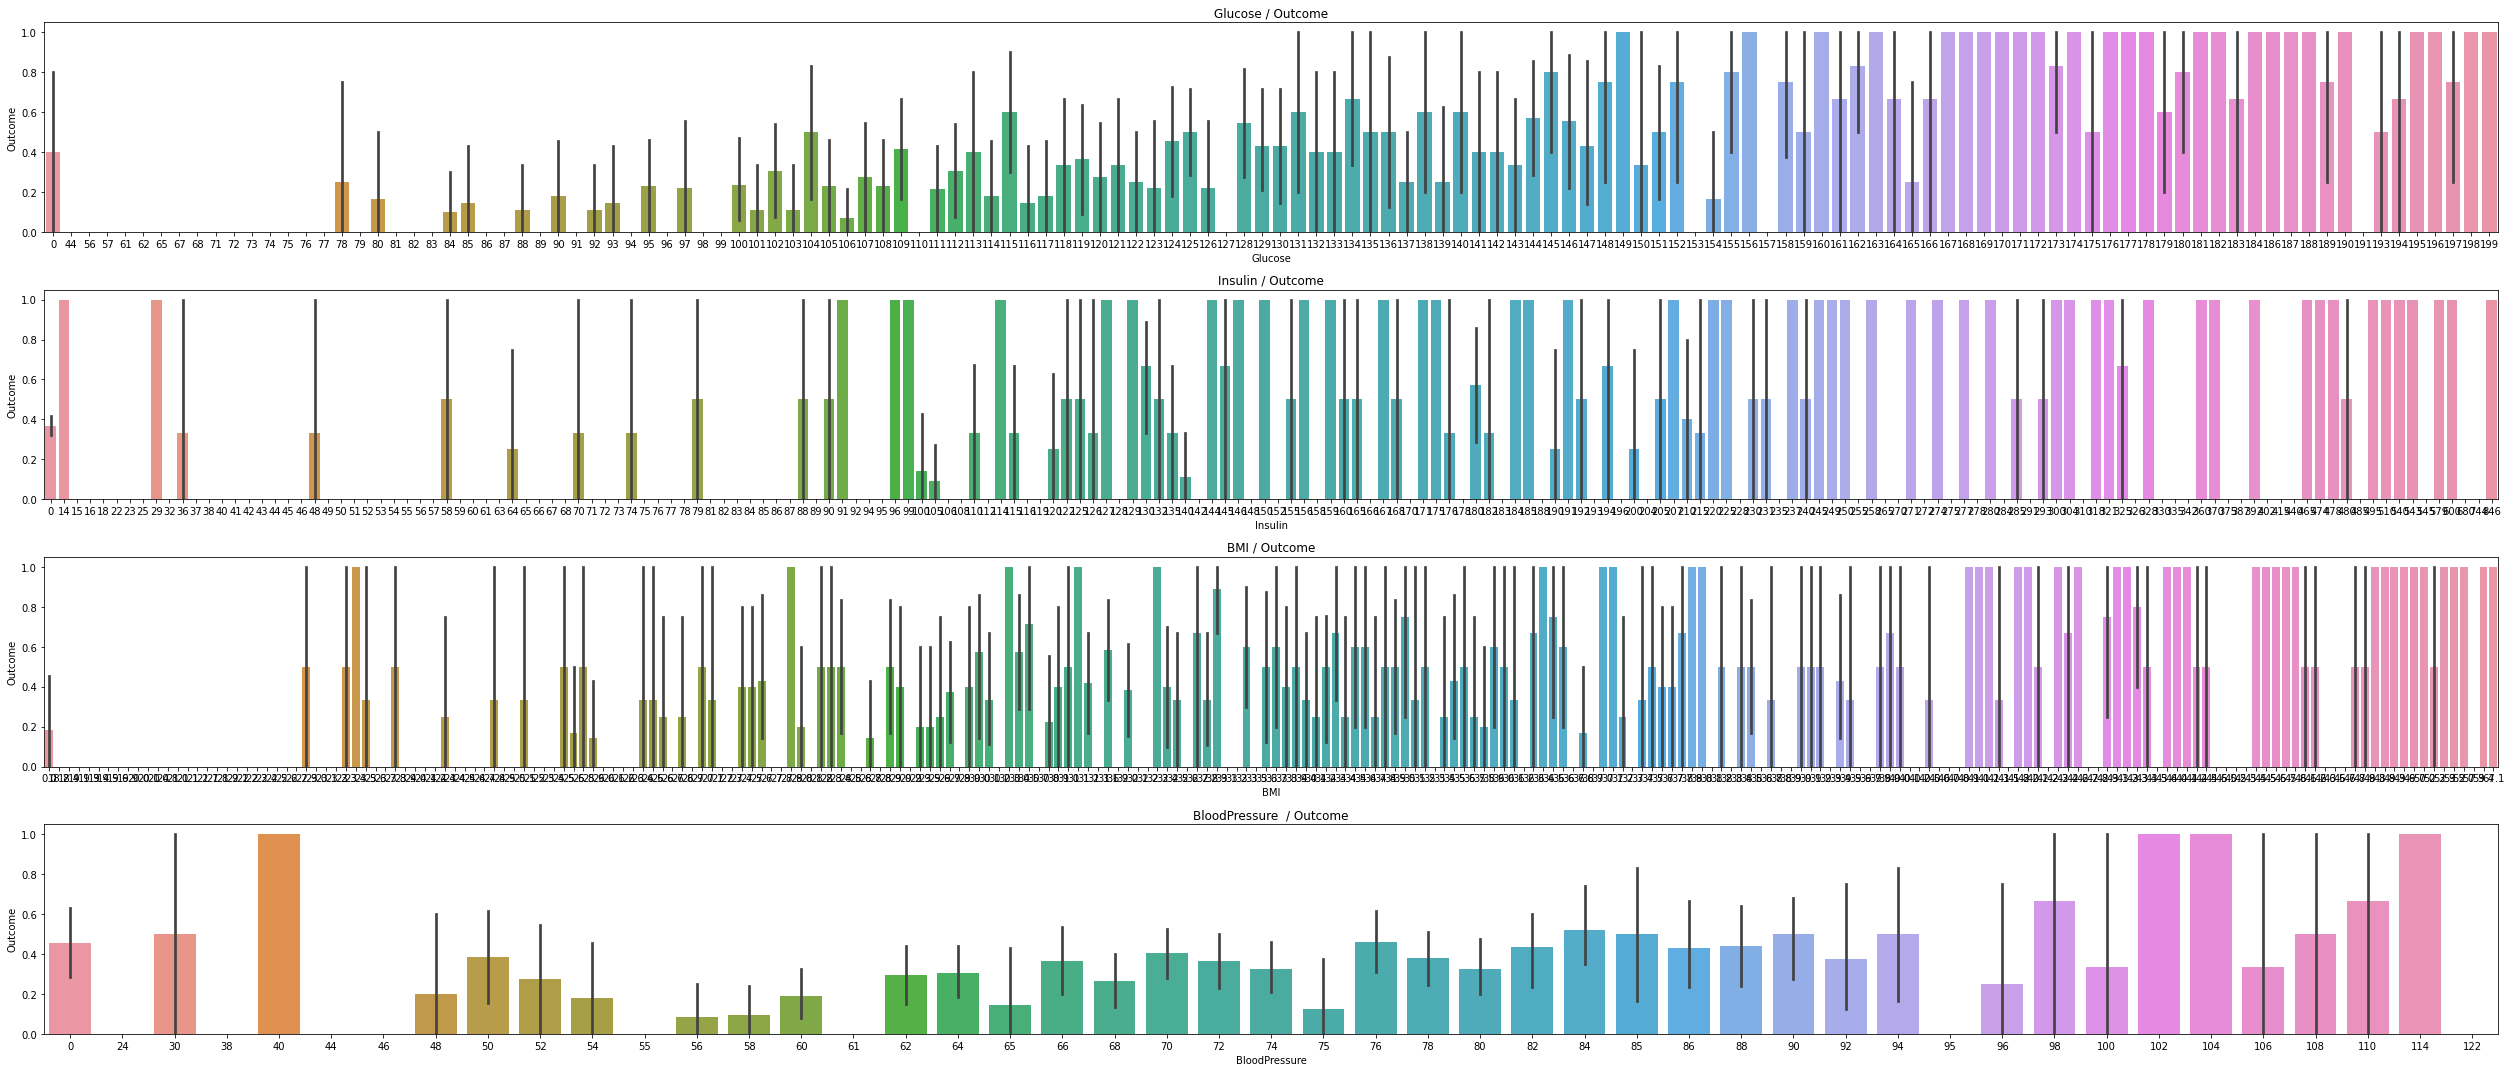

In [ ]:
subplots_that_are_too_big_bar()

In [ ]:
def plot_dpf_bar():
  '''
  Summary: This function plots the Diabetes Pedigree Function columns since the scale is simple

  Description:  The purpose of this function is to easily create a bar plot for a specific column.
                The goal is to make it a big for loop and loop over the necessary columns to make the code simpler and more modular

  Parameters: None

  Return: None, however it makes the chart for us
  '''
  fig, ax = plt.subplots(nrows = 1, figsize = (30, 30))

  dpf = sns.barplot(x = diabetes["DiabetesPedigreeFunction"], y = diabetes["Outcome"])
  ax.set_title("DiabetesPedigreeFunction / Outcome")
  dpf.set_xticklabels(dpf.get_xticklabels())
  dpf.tick_params(axis = "x", which = "major")

  fig.tight_layout()
  plt.show()

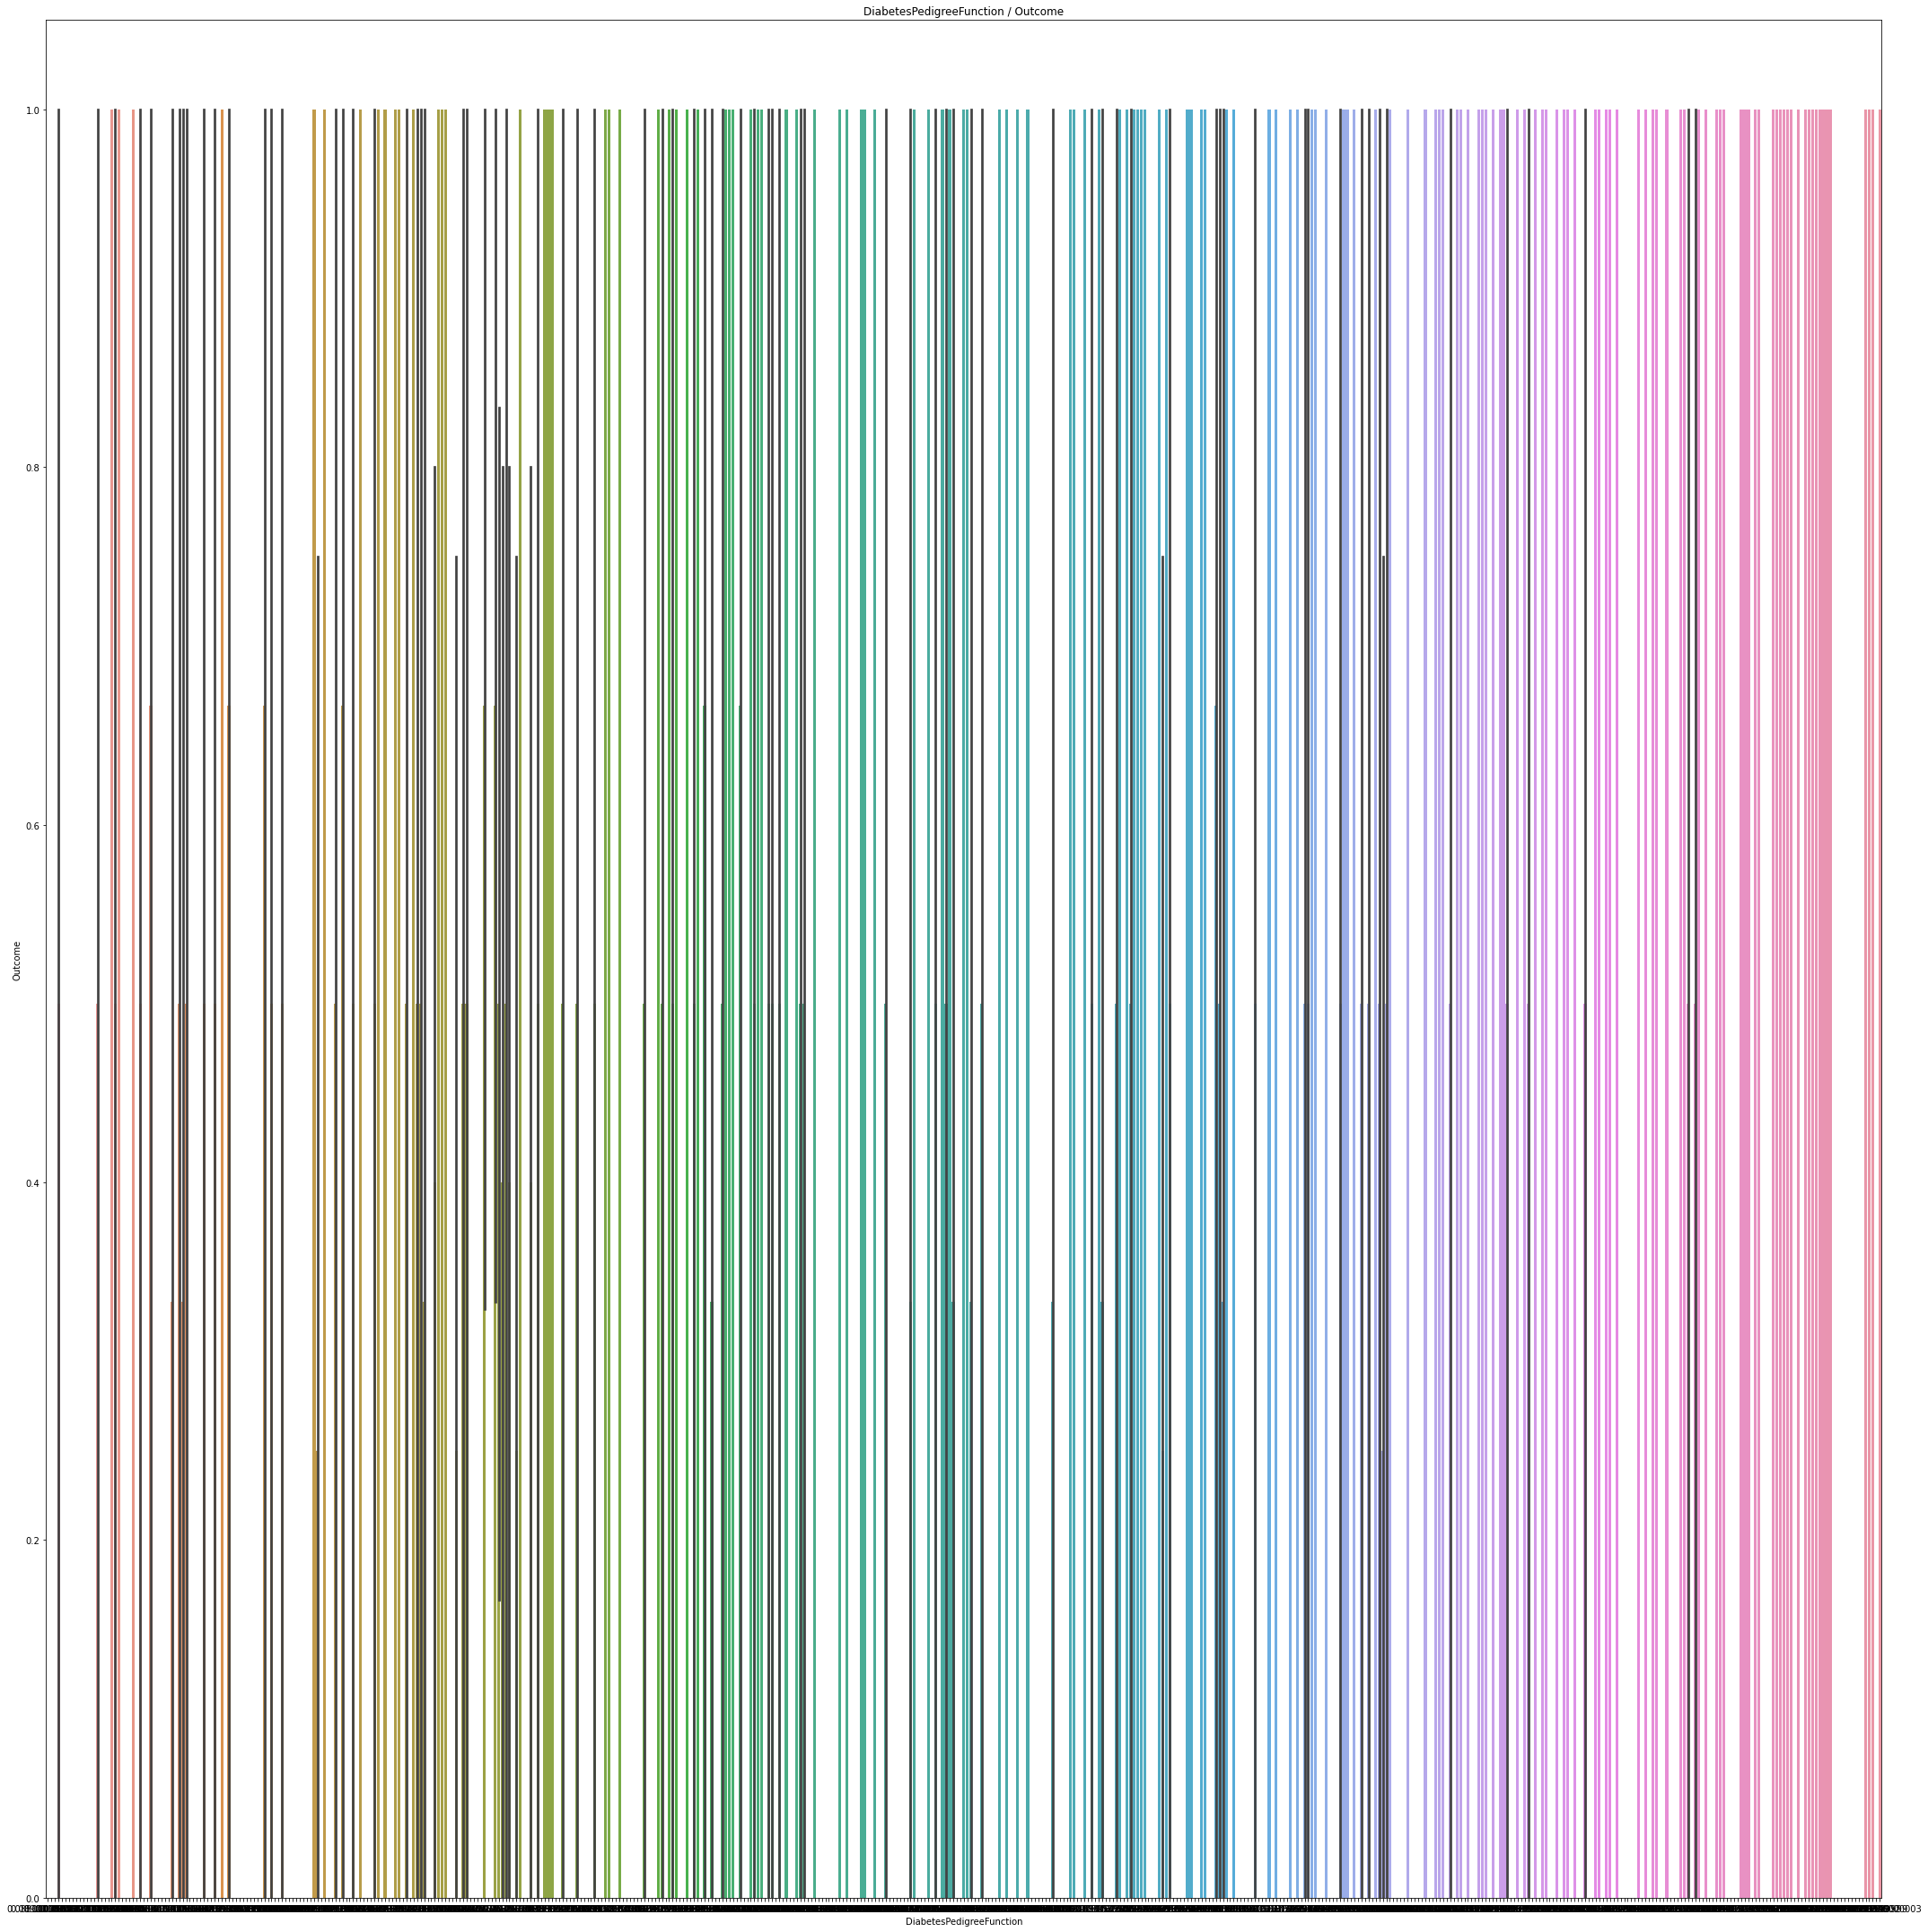

In [ ]:
plot_dpf_bar()

# How to read a bar plot
  - Does the Diabetes Pedigree Function affect the likelihood of you having diabetes?
    - It appears it does but this bar plot is hideous so we should not use it

In [ ]:
def master_bar():
  '''
  Summary: This function will call all of my bar plots from one conveinent call

  Description:  The purpose of this function is to easily create the bar plots from one function.
                The goal is to make it a big for loop and loop over the necessary columns to make the code simpler and more modular

  Parameters: None

  Return: None, however it makes the chart for us
  '''
  ##### I can not see the output - I should try returning the charts into variables and show() them #####
  subplots_bar()
  subplots_that_are_too_big_bar()
  subplot_dpf_bar()

#As we continue with the charts, it is time to see if a pie chart helps!

In [ ]:
def pie_charts():
  '''
  DO NOT USE PIE CHARTS FOR THIS DATA SET IT DOES NOT MAKE SENSE TO USE

  Summary: This function plots a pie chart of the data

  Description: The point of this function is to make a pie chart to connect us with the data,
               however it is not helpful in this instance.

  Parameters: None

  Return: None, however it makes a chart for us
  '''

  plt.figure(figsize = (14, 8))
  ax = plt.subplot(121, aspect = "equal")
  plt.pie(x = diabetes["BMI"].values)


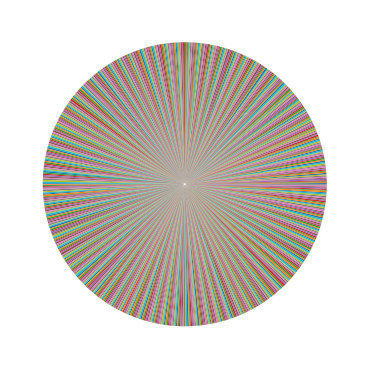

In [ ]:
pie_charts()

##We are ready to try correlations to see what data is correlated to the rest.  Correlations are great to see this!

In [ ]:
def correlations_with_pandas():
  '''
  Pandas correlations
  '''

  print(diabetes.corr(method = "pearson"))

def correlations_with_sns():
  '''
  Sns correlations
  '''

  corr = diabetes.corr(method = "pearson")

  fig, ax = plt.subplots(figsize = (14, 5))

  #We can use this as well
  cmap = sns.diverging_palette(230, 30, as_cmap = True)

  #Make a heatmap and then rotate the xticks to make it easier to read
  sns_corr = sns.heatmap(corr, annot = True, fmt = '.1g', vmin = -1, vmax = 1, center = 0, cmap = "coolwarm", linecolor = "black", linewidths = 3, cbar_kws = {"orientation": "vertical"})
  sns_corr.set_xticklabels(sns_corr.get_xticklabels(), rotation = 35)

In [ ]:
correlations_with_pandas()

                          Pregnancies   Glucose  ...       Age   Outcome
Pregnancies                  1.000000  0.129459  ...  0.544341  0.221898
Glucose                      0.129459  1.000000  ...  0.263514  0.466581
BloodPressure                0.141282  0.152590  ...  0.239528  0.065068
SkinThickness               -0.081672  0.057328  ... -0.113970  0.074752
Insulin                     -0.073535  0.331357  ... -0.042163  0.130548
BMI                          0.017683  0.221071  ...  0.036242  0.292695
DiabetesPedigreeFunction    -0.033523  0.137337  ...  0.033561  0.173844
Age                          0.544341  0.263514  ...  1.000000  0.238356
Outcome                      0.221898  0.466581  ...  0.238356  1.000000

[9 rows x 9 columns]


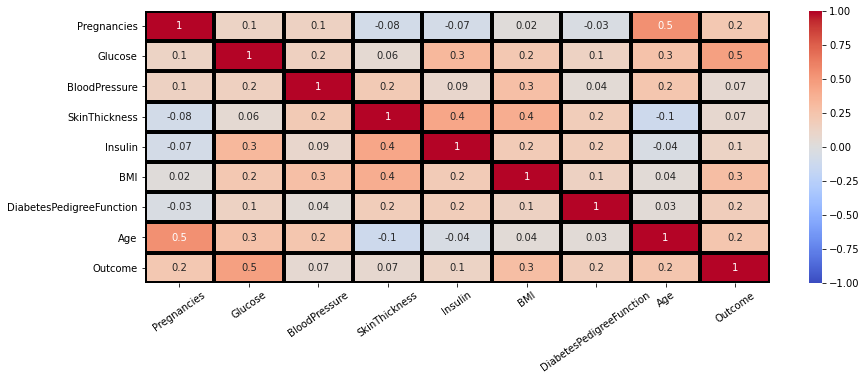

In [ ]:
correlations_with_sns()

#What can we learn from the heatmap?
- What do the parameters mean?
  - corr is the correlation we want
  - annot = True writes the numbers on the squares
  - fmt = ".1g" allows us to reduce the amount of decimals in the square to make the square clearer
  - vmin, vmax = The min value the square can show and the max value the sqaure can have.
  - center = 0 allows us to make the central value a specific value
  - linecolor = "black" colors the lines black to make it more readable
  - linewidths = 3 can directly influence the size of the line
  - cbar_kws{"orientation": "horizontal"}
  - cbar = False allows us to remove the colorbar in general

- What are we noticing?
  - Pregnancies and age are correlated
  - Glucose and the outcome are correlated
  - Insulin and glucose are somewhat correlated
  - Age and glucose are somewhat correlated
  - Skin thickness and insulin are coorelated
  - Skin thickness and BMI are correlated

- It is time to build the rest of the plots and then see what these are like

#We will circle back to this I promise.

- I want to build the next plots to see how they are built and I want to develop the underlying intuition for how this works in order to allow me to cut down the time I spend on EDA.

In [ ]:
def countplots():
  fig, ax_count = plt.subplots(nrows = 3, ncols = 2, figsize = (25, 20))

  pregnancies_sns_countplot = sns.countplot(x = diabetes["Pregnancies"], ax = ax_count[0][0], data = diabetes)
  ax_count[0][0].set_title("Pregnancy Count")
  pregnancies_sns_countplot.tick_params(axis = "x", which = "major")

  skin_thickness_sns_countplot = sns.countplot(x = diabetes["SkinThickness"], ax = ax_count[0][1], data = diabetes)
  ax_count[0][1].set_title("SkinThickness")
  skin_thickness_sns_countplot.tick_params(axis = "x", which = "major")
 
  blood_pressure_sns_countplot = sns.countplot(x = diabetes["BloodPressure"], ax = ax_count[1][0], data = diabetes)
  ax_count[1][0].set_title("BloodPressure")
  blood_pressure_sns_countplot.tick_params(axis = "x", which = "major")

  age_sns_countplot = sns.countplot(x = diabetes["Age"], ax = ax_count[1][1], data = diabetes)
  ax_count[1][1].set_title("Age")
  age_sns_countplot.tick_params(axis = "x", which = "major")

  outcome_sns_countplot = sns.countplot(x = diabetes["Outcome"], ax = ax_count[2][0], data = diabetes)
  ax_count[2][0].set_title("Outcome")
  outcome_sns_countplot.tick_params(axis = "x", which = "major")
  
  fig.tight_layout()
  plt.show()

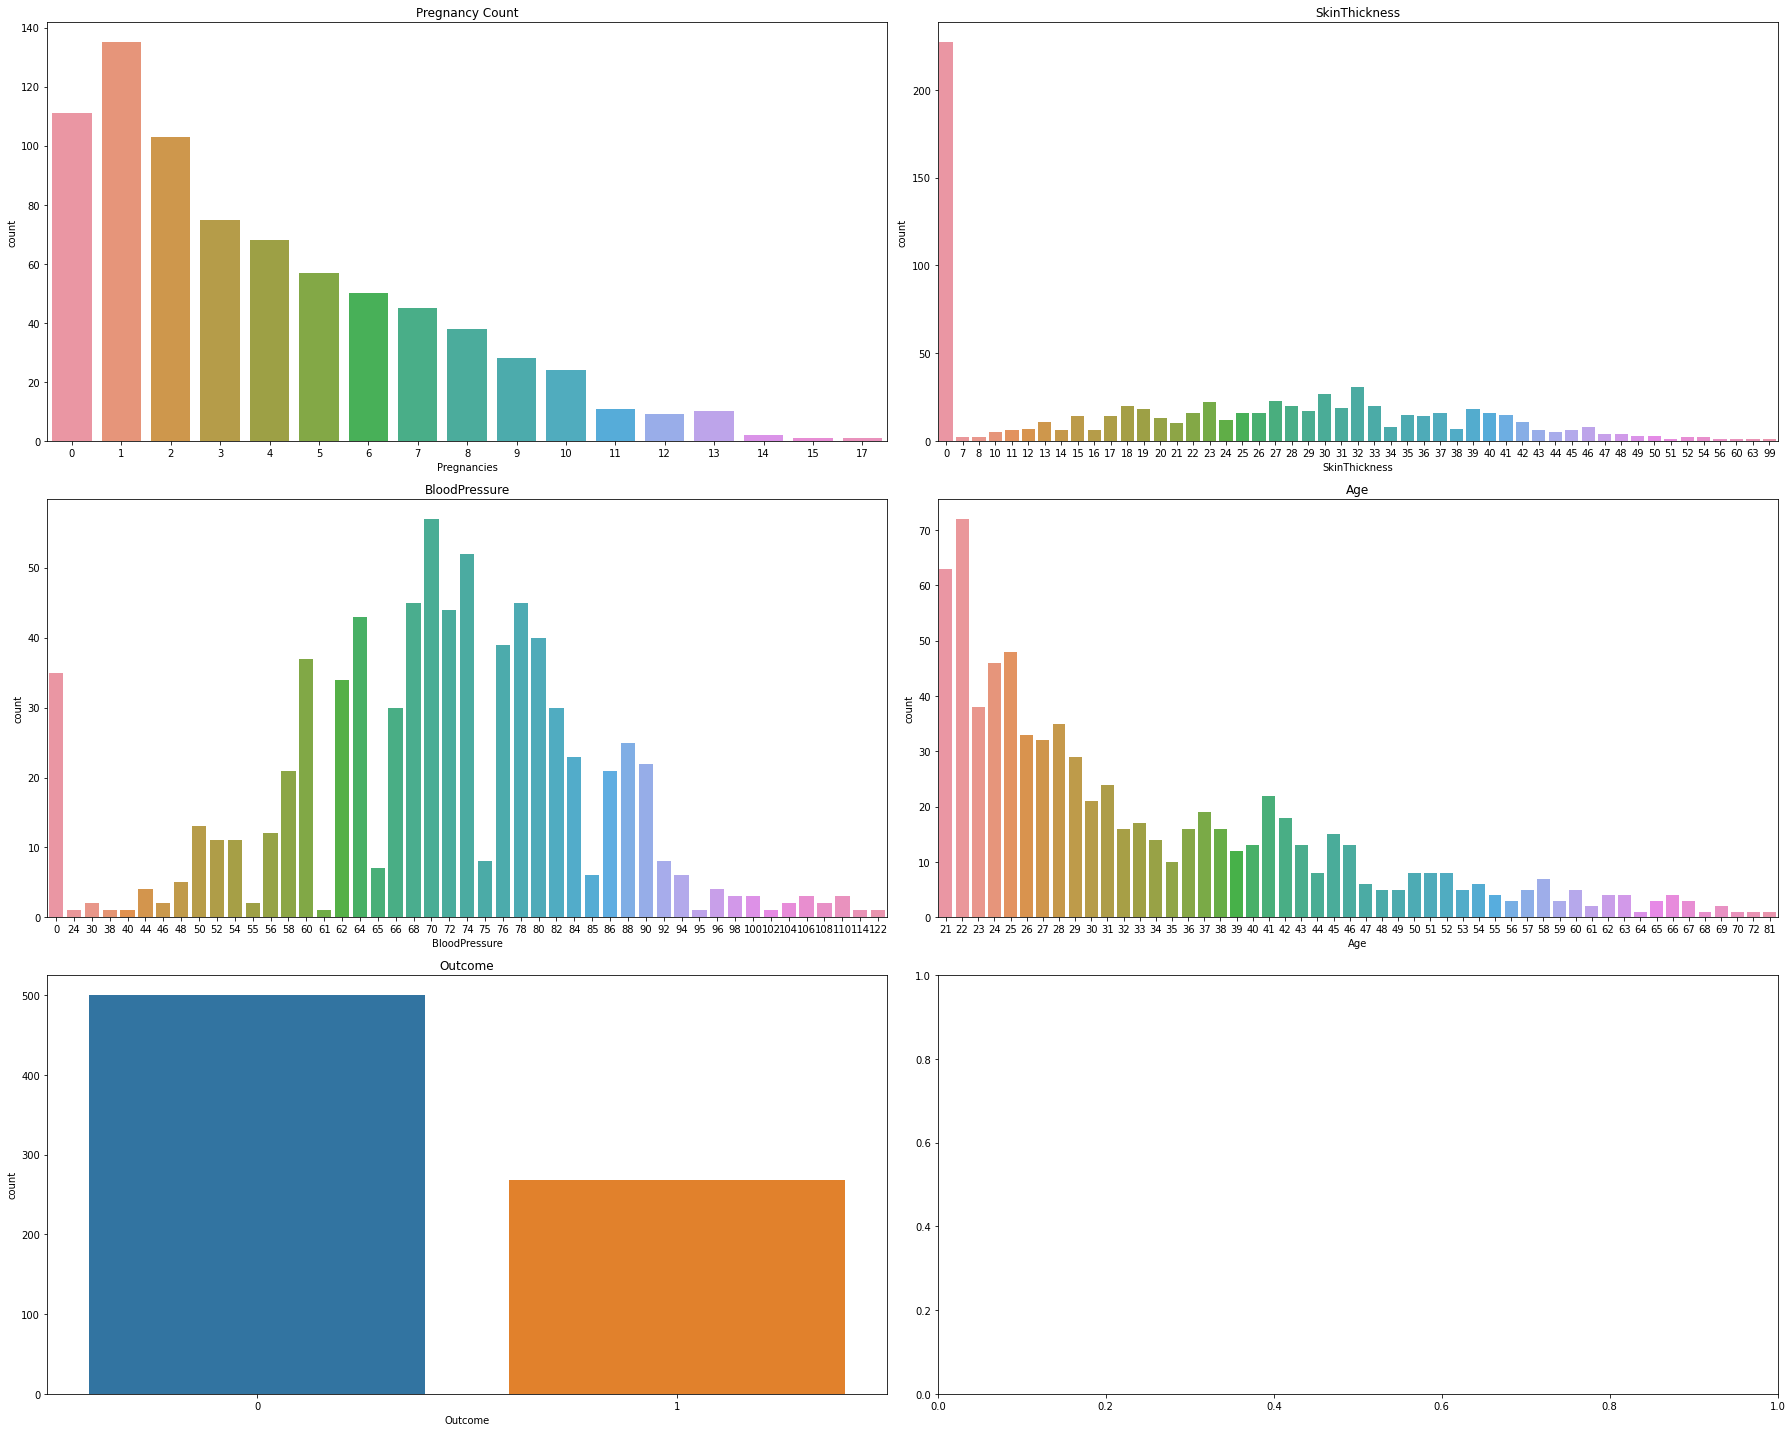

In [ ]:
countplots()

In [ ]:
def countplots_that_are_big():
  fig, ax_count_glucose = plt.subplots(nrows = 1, figsize = (50, 25))

  glucose_sns_countplot = sns.countplot(y = diabetes["Glucose"], ax = ax_count_glucose, data = diabetes)
  ax_count_glucose.set_title("Glucose Count")
  glucose_sns_countplot.tick_params(axis = "x", which = "major")
  glucose_sns_countplot.set_xticklabels(glucose_sns_countplot.get_xticklabels(), rotation = 45)


  fig.tight_layout()
  plt.show()

  insulin_fig, ax_count_insulin = plt.subplots(nrows = 1, figsize = (35, 25))

  insulin_sns_countplot = sns.countplot(x = diabetes["Insulin"], ax = ax_count_insulin, data = diabetes)
  ax_count_insulin.set_title("Insulin Count")
  insulin_sns_countplot.tick_params(axis = "x", which = "major")
  insulin_sns_countplot.set_xticklabels(insulin_sns_countplot.get_xticklabels(), rotation = 45)

  insulin_fig.tight_layout()
  plt.show()

  
  bmi_fig, ax_count_bmi = plt.subplots(nrows = 1, figsize = (60, 25))

  bmi_sns_countplot = sns.countplot(y = diabetes["BMI"], ax = ax_count_bmi, data = diabetes)
  ax_count_bmi.set_title("BMI Count")
  bmi_sns_countplot.tick_params(axis = "x", which = "major")
  bmi_sns_countplot.set_xticklabels(bmi_sns_countplot.get_xticklabels(), rotation = 45)

  bmi_fig.tight_layout()
  plt.show()



def countplots_extra():


  insulin_sns_countplot = sns.countplot(x = diabetes["Insulin"], ax = ax_count_big[1], data = diabetes)
  ax_count_big[1].set_title("Insulin")
  insulin_sns_countplot.tick_params(axis = "x", which = "major")

  bmi_sns_countplot = sns.countplot(y = diabetes["BMI"], ax = ax_count_big[2], data = diabetes, orient = "h")
  ax_count_big[2].set_title("BMI")
  bmi_sns_countplot.tick_params(axis = "x")

  dpf_sns_countplot = sns.countplot(x = diabetes["DiabetesPedigreeFunction"], ax = ax_count_big[3], data = diabetes)
  ax_count_big[3].set_title("DiabetesPedigreeFunction")
  dpf_sns_countplot.tick_params(axis = "x", which = "major")

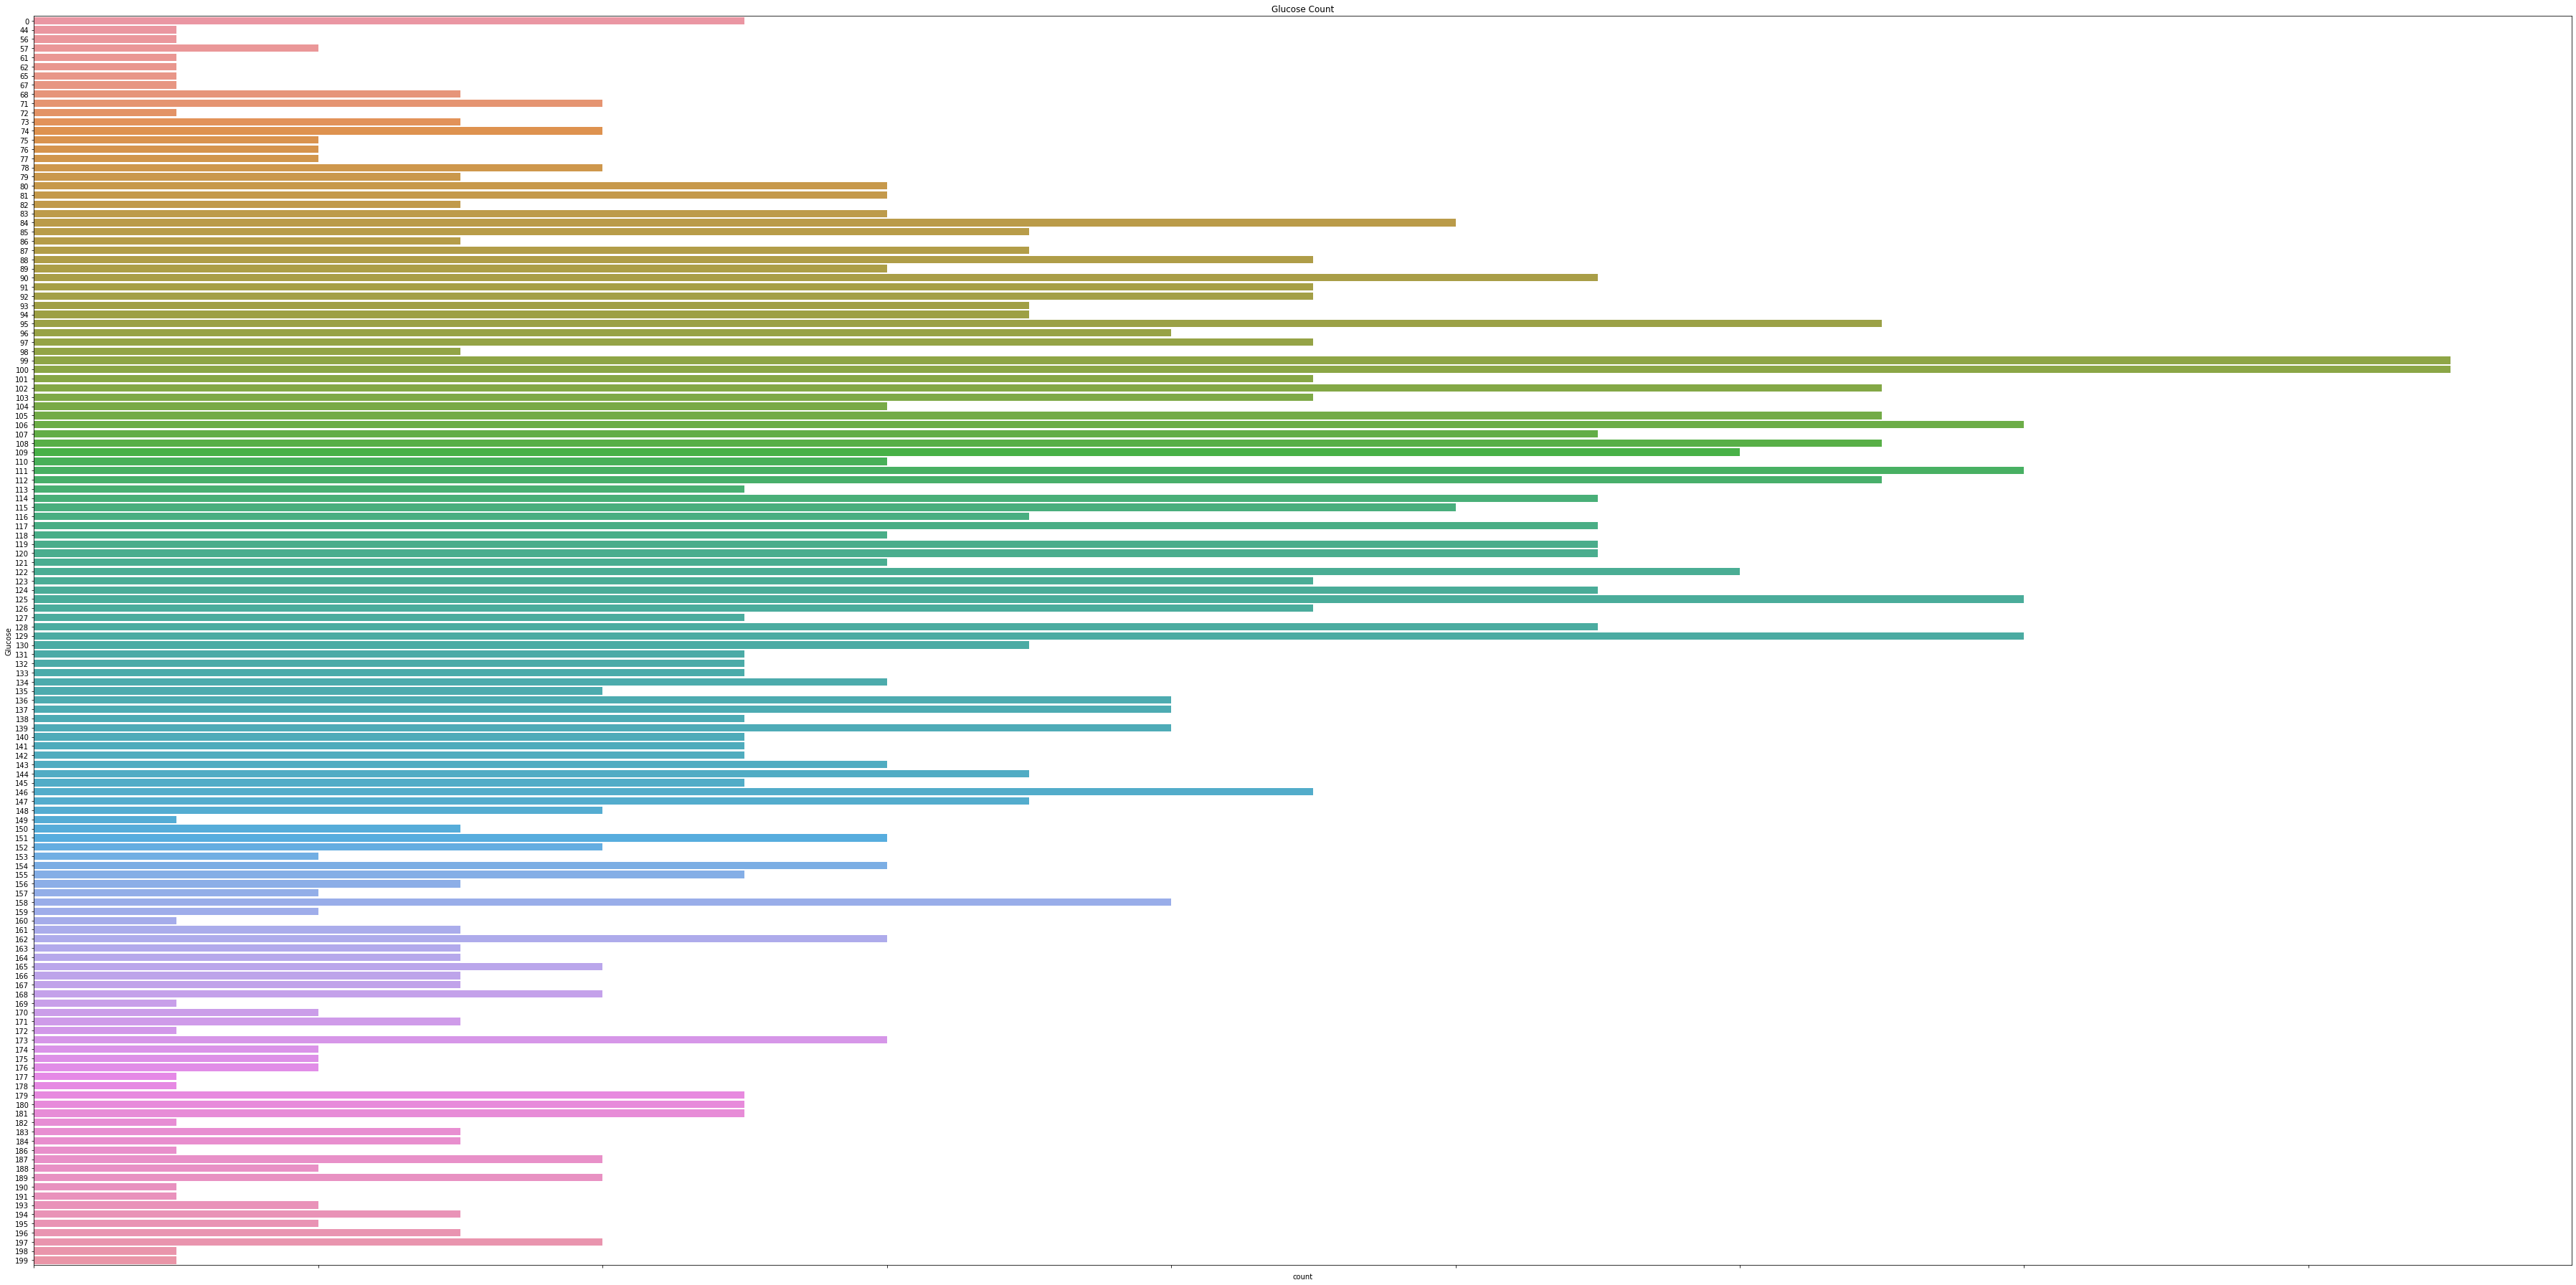

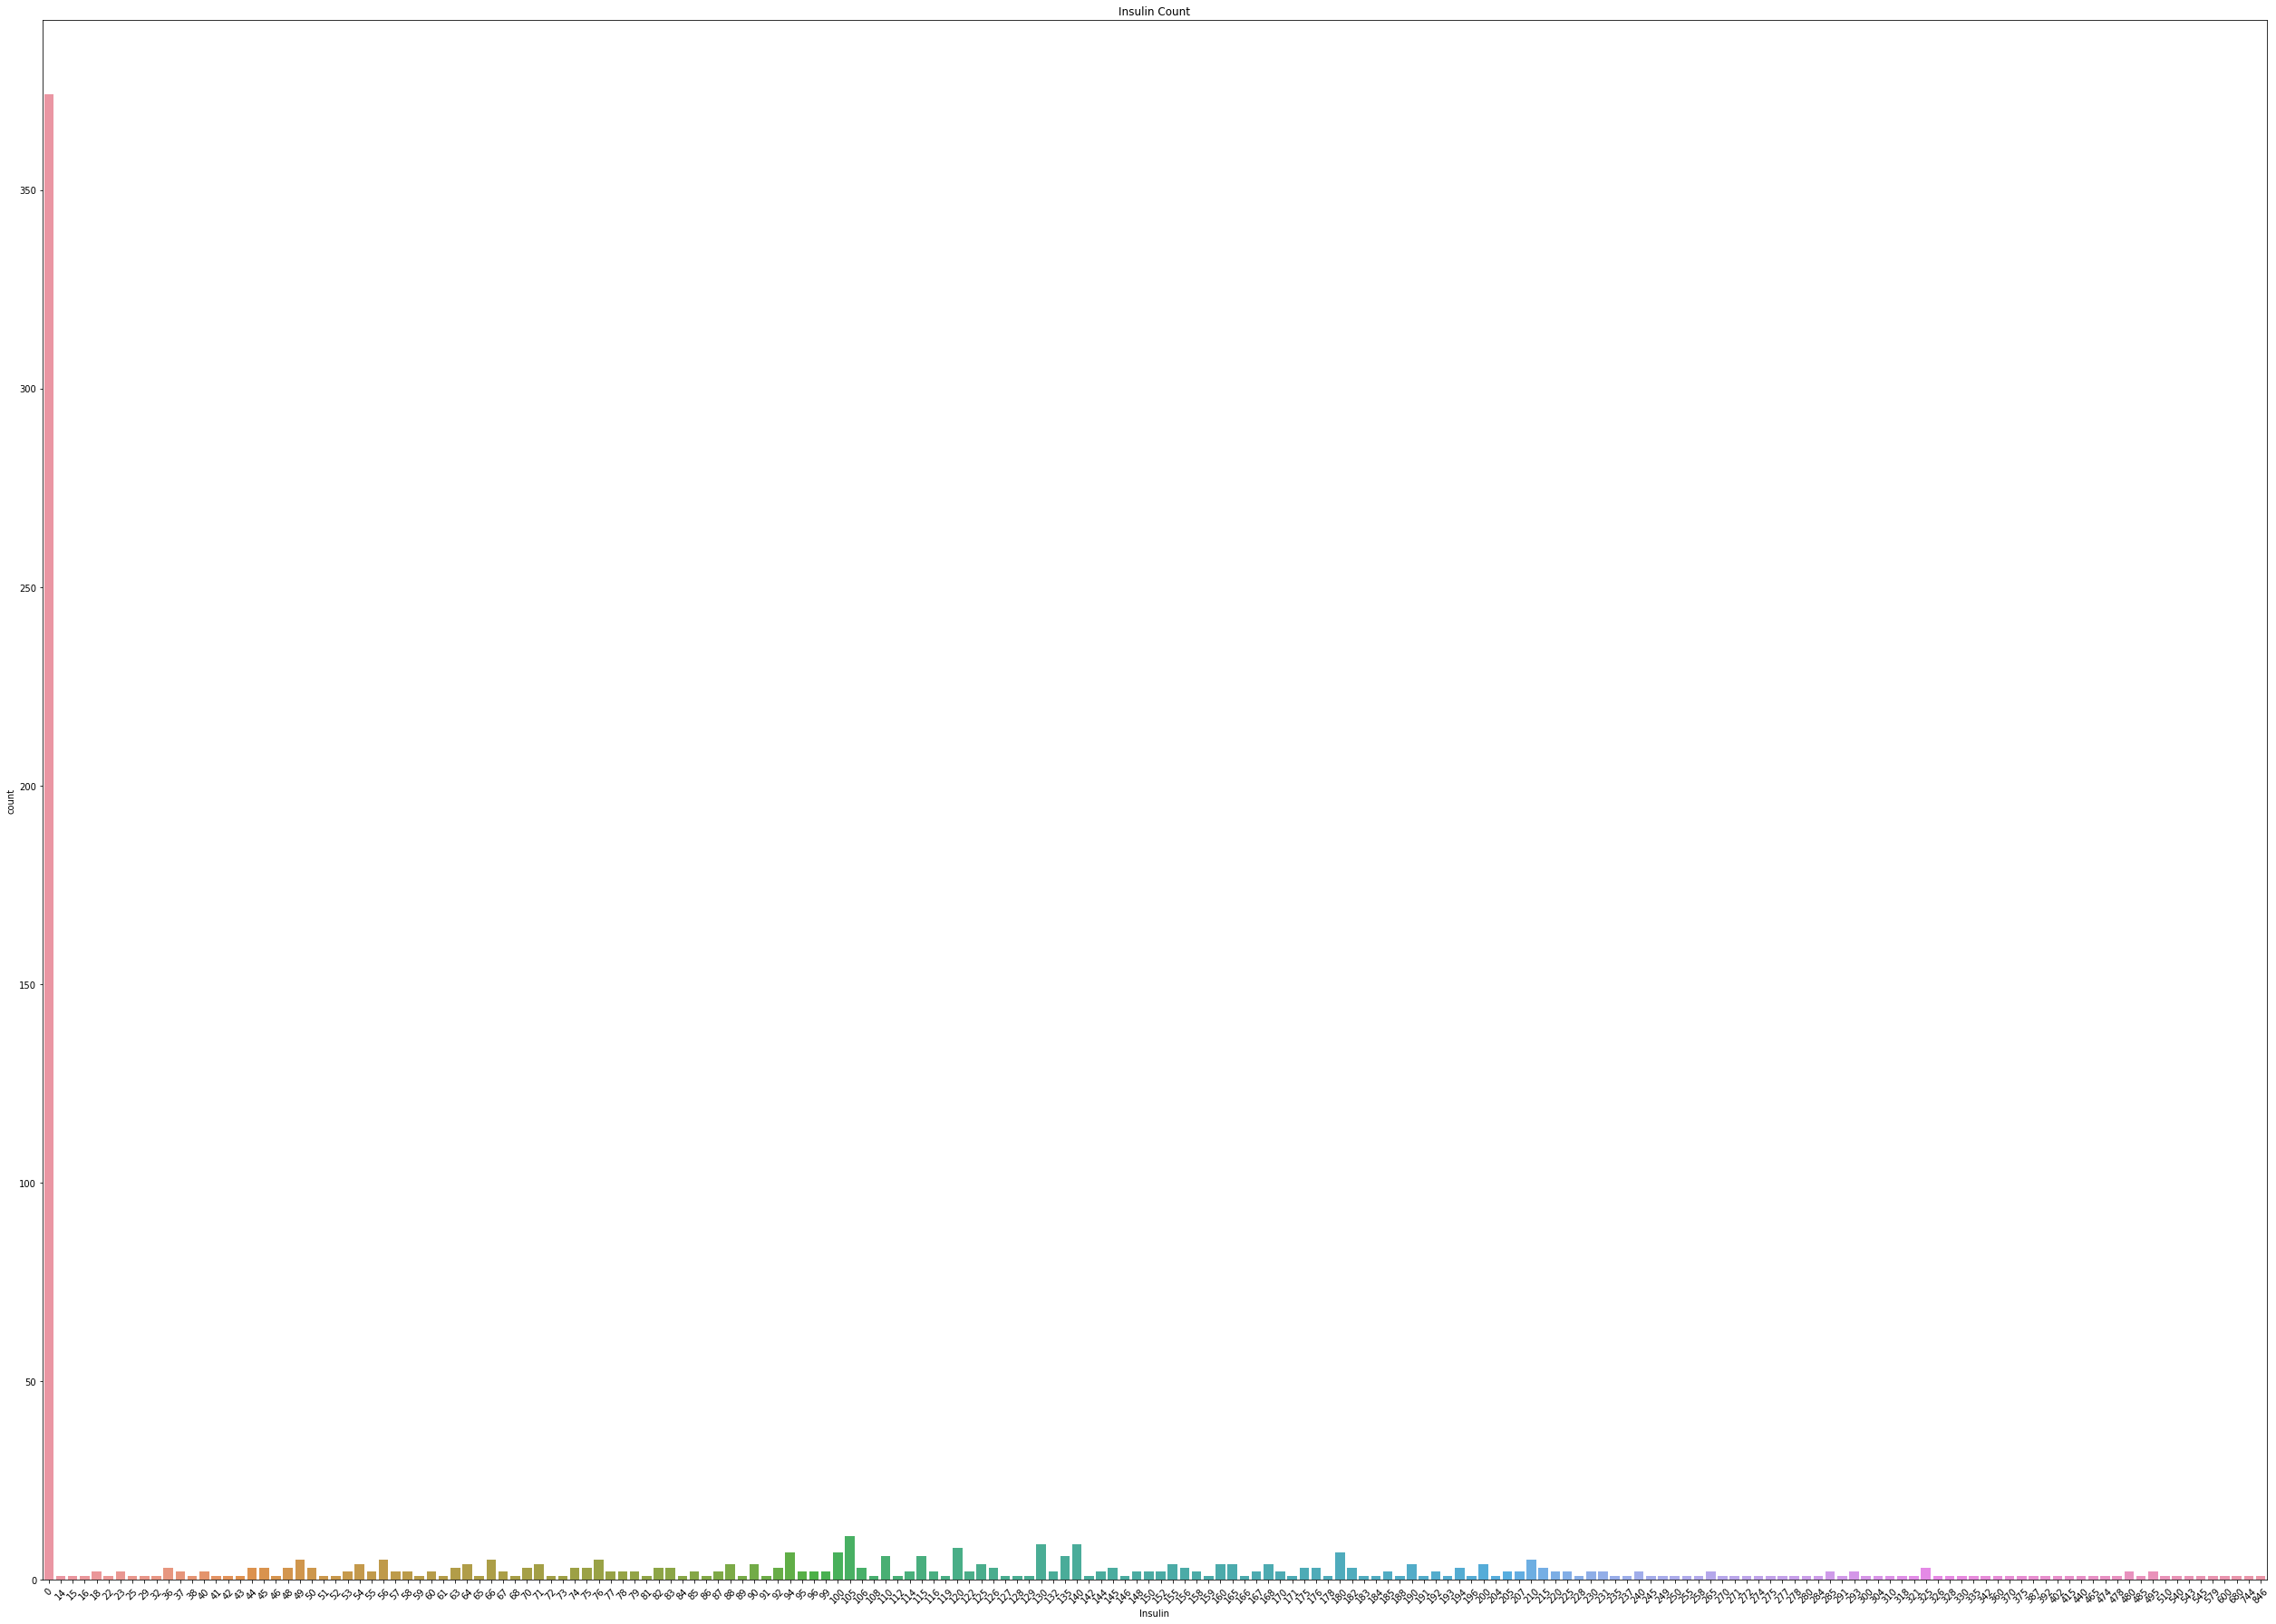

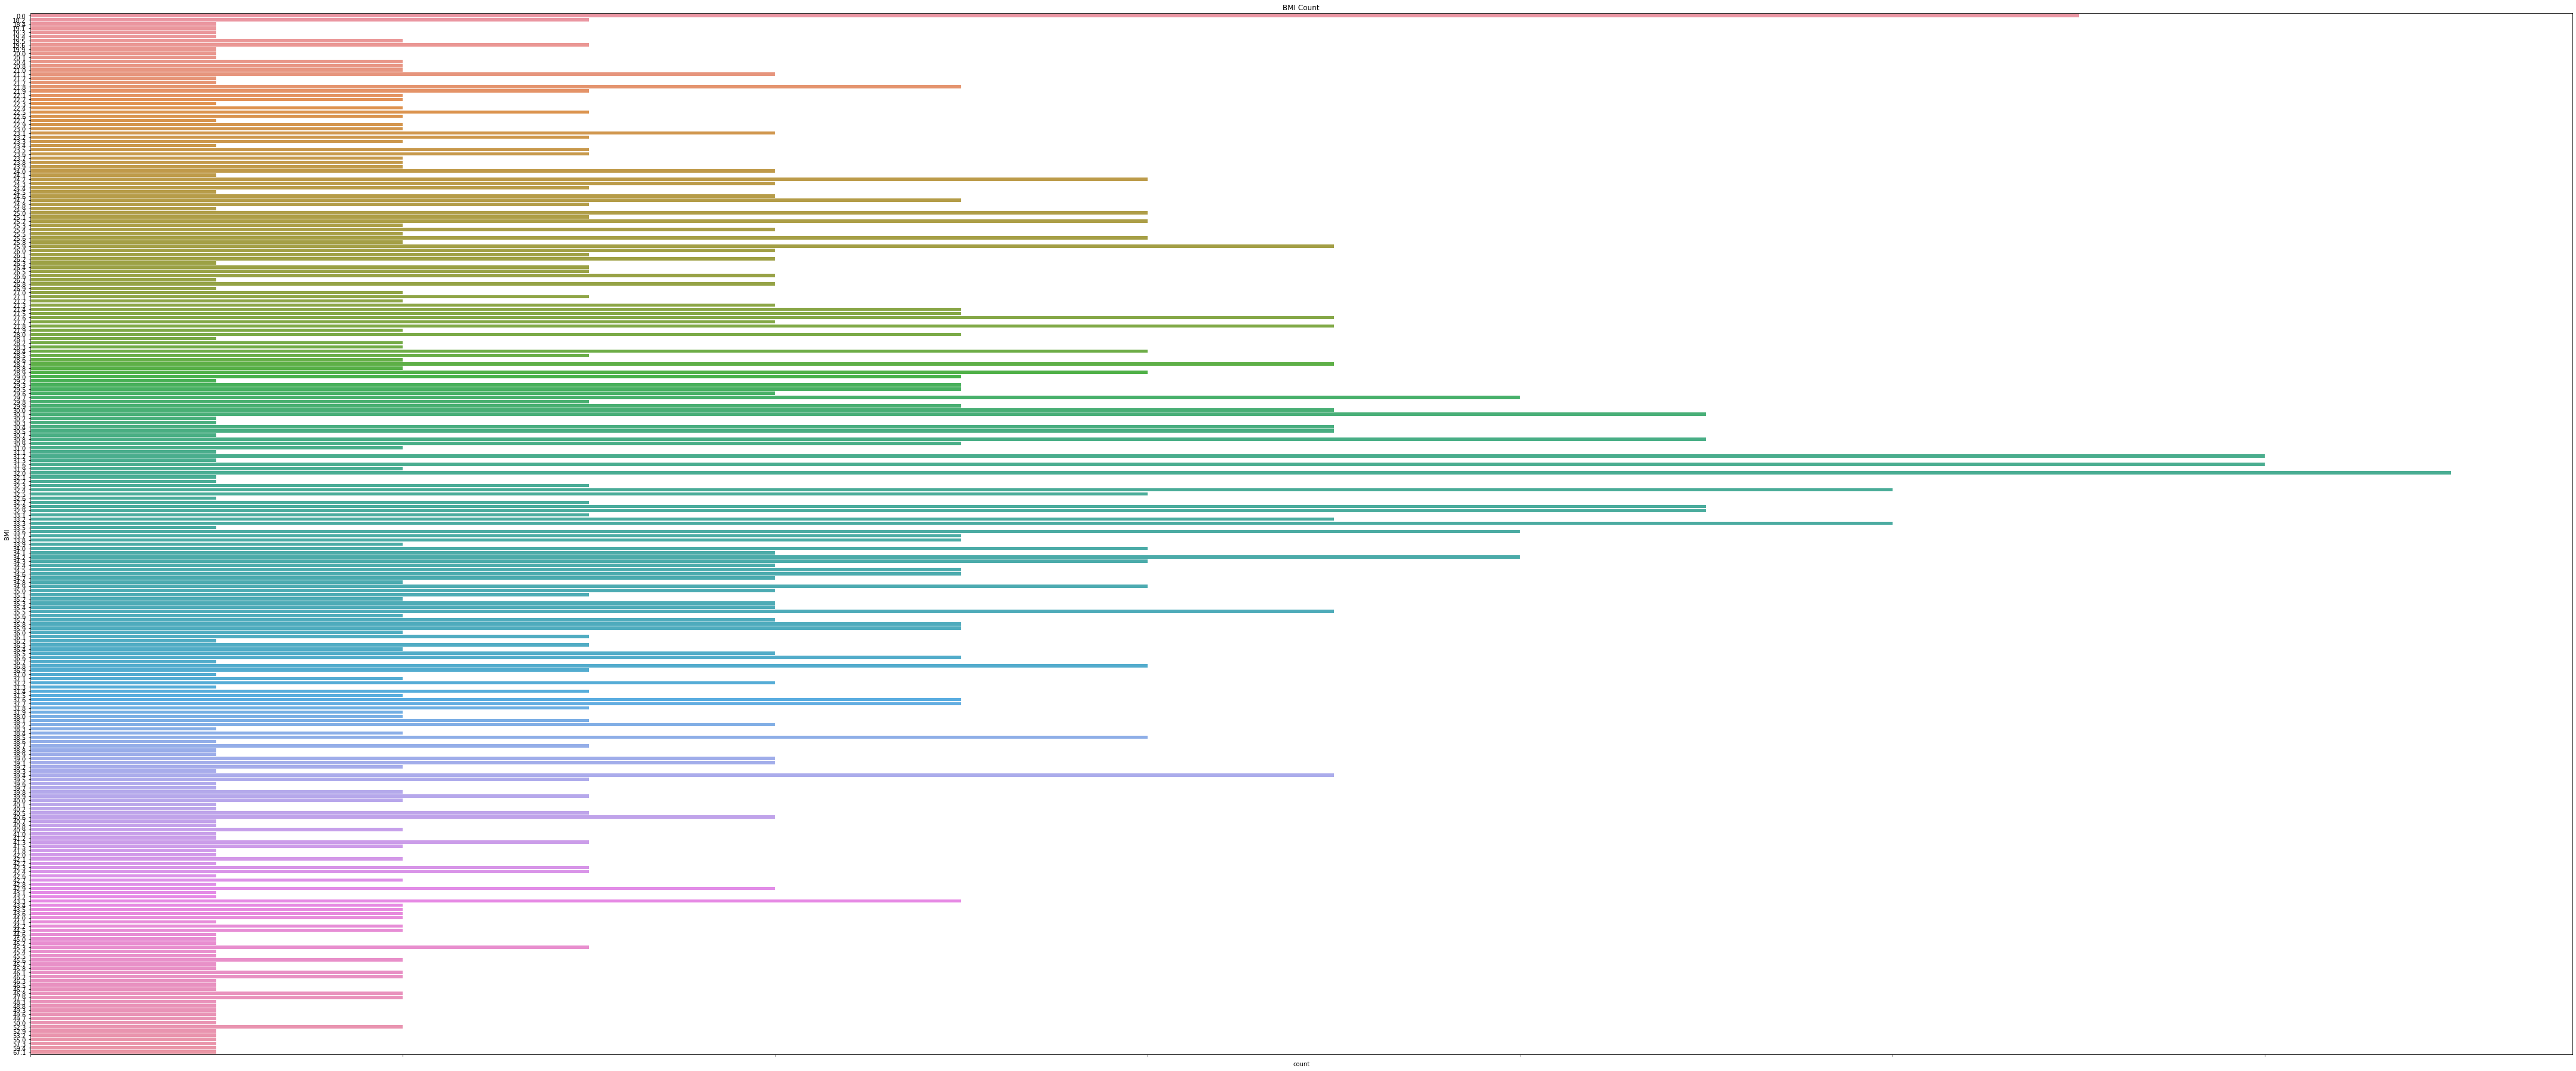

In [ ]:
countplots_that_are_big()

In [ ]:
def master_countplot():
  countplots()
  countplots_that_are_big()

#Lets now see what we can learn from line charts!

In [ ]:
#Linecharts
def linecharts():
  fig, ax_line = plt.subplots(nrows = 3, ncols = 3, figsize = (20, 15))

  pregnancies_line = sns.lineplot(x = diabetes["Pregnancies"], y = diabetes["Outcome"], ax = ax_line[0][0], data = diabetes)
  ax_line[0][0].set_title("Pregnancies / Outcome")
  pregnancies_line.tick_params(axis = "x", which = "major")

  glucose_line = sns.lineplot(x = diabetes["Glucose"], y = diabetes["Outcome"], ax = ax_line[0][1], data = diabetes)
  ax_line[0][1].set_title("Glucose / Outcome")
  glucose_line.tick_params(axis = "x", which = "major")

  blood_pressure_line = sns.lineplot(x = diabetes["BloodPressure"], y = diabetes["Outcome"], ax = ax_line[0][2], data = diabetes)
  ax_line[0][2].set_title("Blood Pressure / Outcome")
  blood_pressure_line.tick_params(axis = "x", which = "major")

  skin_thickness_line = sns.lineplot(x = diabetes["SkinThickness"], y = diabetes["Outcome"], ax = ax_line[1][0], data = diabetes)
  ax_line[1][0].set_title("Skin Thickness / Outcome")
  skin_thickness_line.tick_params(axis = "x", which = "major")

  insulin_line = sns.lineplot(x = diabetes["Insulin"], y = diabetes["Outcome"], ax = ax_line[1][1], data = diabetes)
  ax_line[1][1].set_title("Insulin / Outcome")
  insulin_line.tick_params(axis = "x", which = "major")

  bmi_line = sns.lineplot(x = diabetes["BMI"], y = diabetes["Outcome"], ax = ax_line[1][2], data = diabetes)
  ax_line[1][2].set_title("BMI / Outcome")
  bmi_line.tick_params(axis = "x", which = "major")

  dpf_line = sns.lineplot(x = diabetes["DiabetesPedigreeFunction"], y = diabetes["Outcome"], ax = ax_line[2][0], data = diabetes)
  ax_line[2][0].set_title("Diabetes Pedigree Function / Outcome")
  dpf_line.tick_params(axis = "x", which = "major")

  age_line = sns.lineplot(x = diabetes["Age"], y = diabetes["Outcome"], ax = ax_line[2][1], data = diabetes)
  ax_line[2][1].set_title("Age / Outcome")
  age_line.tick_params(axis = "x", which = "major")

  fig.tight_layout()
  plt.show()

  #Build the lineplots and see what needs to be separated

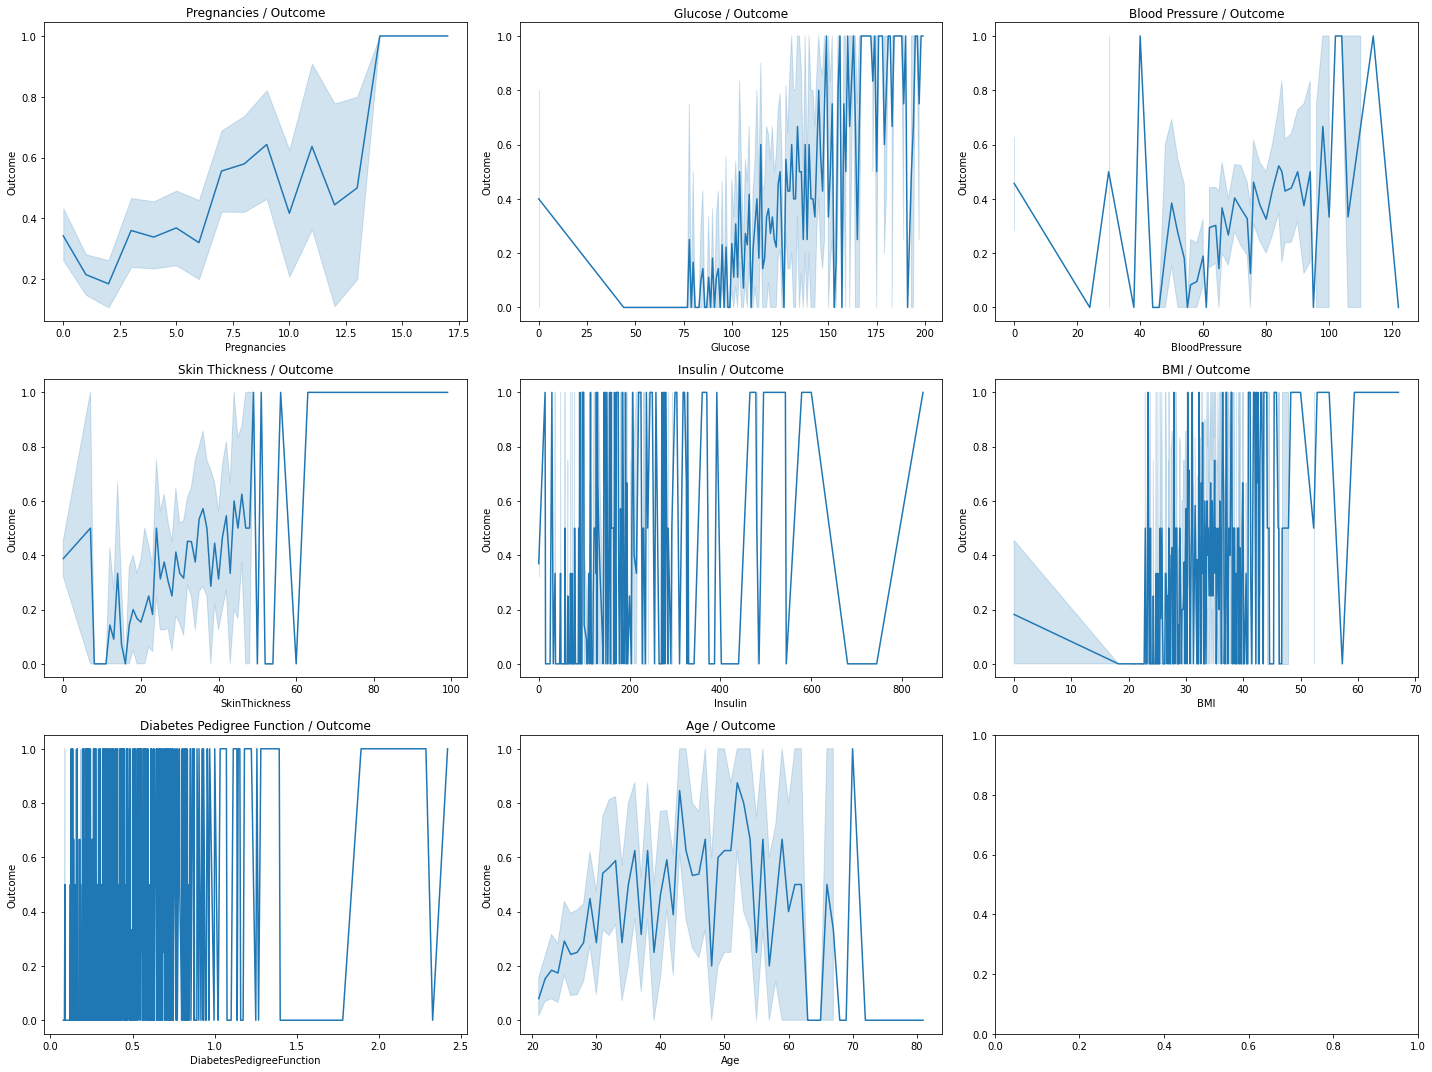

In [ ]:
linecharts()

In [ ]:
def linecharts_for_correlation():
  fig, ax_line_corr = plt.subplots(nrows = 3, ncols = 2, figsize = (20, 20))

  glucose_to_insulin_corr_line = sns.lineplot(x = diabetes["Glucose"], y = diabetes["Insulin"], ax = ax_line_corr[0][0], data = diabetes)
  ax_line_corr[0][0].set_title("Glucose / Insulin")
  glucose_to_insulin_corr_line.tick_params(axis = "x", which = "major")

  pregnancies_to_age_corr_line = sns.lineplot(x = diabetes["Pregnancies"], y = diabetes["Age"], ax = ax_line_corr[0][1], data = diabetes)
  ax_line_corr[0][1].set_title("Pregnancies / Age")
  pregnancies_to_age_corr_line.tick_params(axis = "x", which = "major")

  age_to_glucose_corr_line = sns.lineplot(x = diabetes["Age"], y = diabetes["Glucose"], ax = ax_line_corr[1][0], data = diabetes)
  ax_line_corr[1][0].set_title("Age / Glucose")
  age_to_glucose_corr_line.tick_params(axis = "x", which = "major")

  skin_thickness_to_insulin_corr_line = sns.lineplot(x = diabetes["SkinThickness"], y = diabetes["Insulin"], ax = ax_line_corr[1][1], data = diabetes)
  ax_line_corr[1][1].set_title("Skin Thickness / Outcome")
  skin_thickness_to_insulin_corr_line.tick_params(axis = "x", which = "major")

  skin_thickness_to_bmi_corr_line = sns.lineplot(x = diabetes["SkinThickness"], y = diabetes["BMI"], ax = ax_line_corr[2][0], data = diabetes)
  ax_line_corr[2][0].set_title("Skin Thickness / BMI")
  skin_thickness_to_bmi_corr_line.tick_params(axis = "x", which = "major")

  fig.tight_layout()
  plt.show()
  #Try others that make sense - glucose to insulin, pregnancies and age, glucose and outcome, age and glucose, skin thickness and insulin, skin thickness and bmi

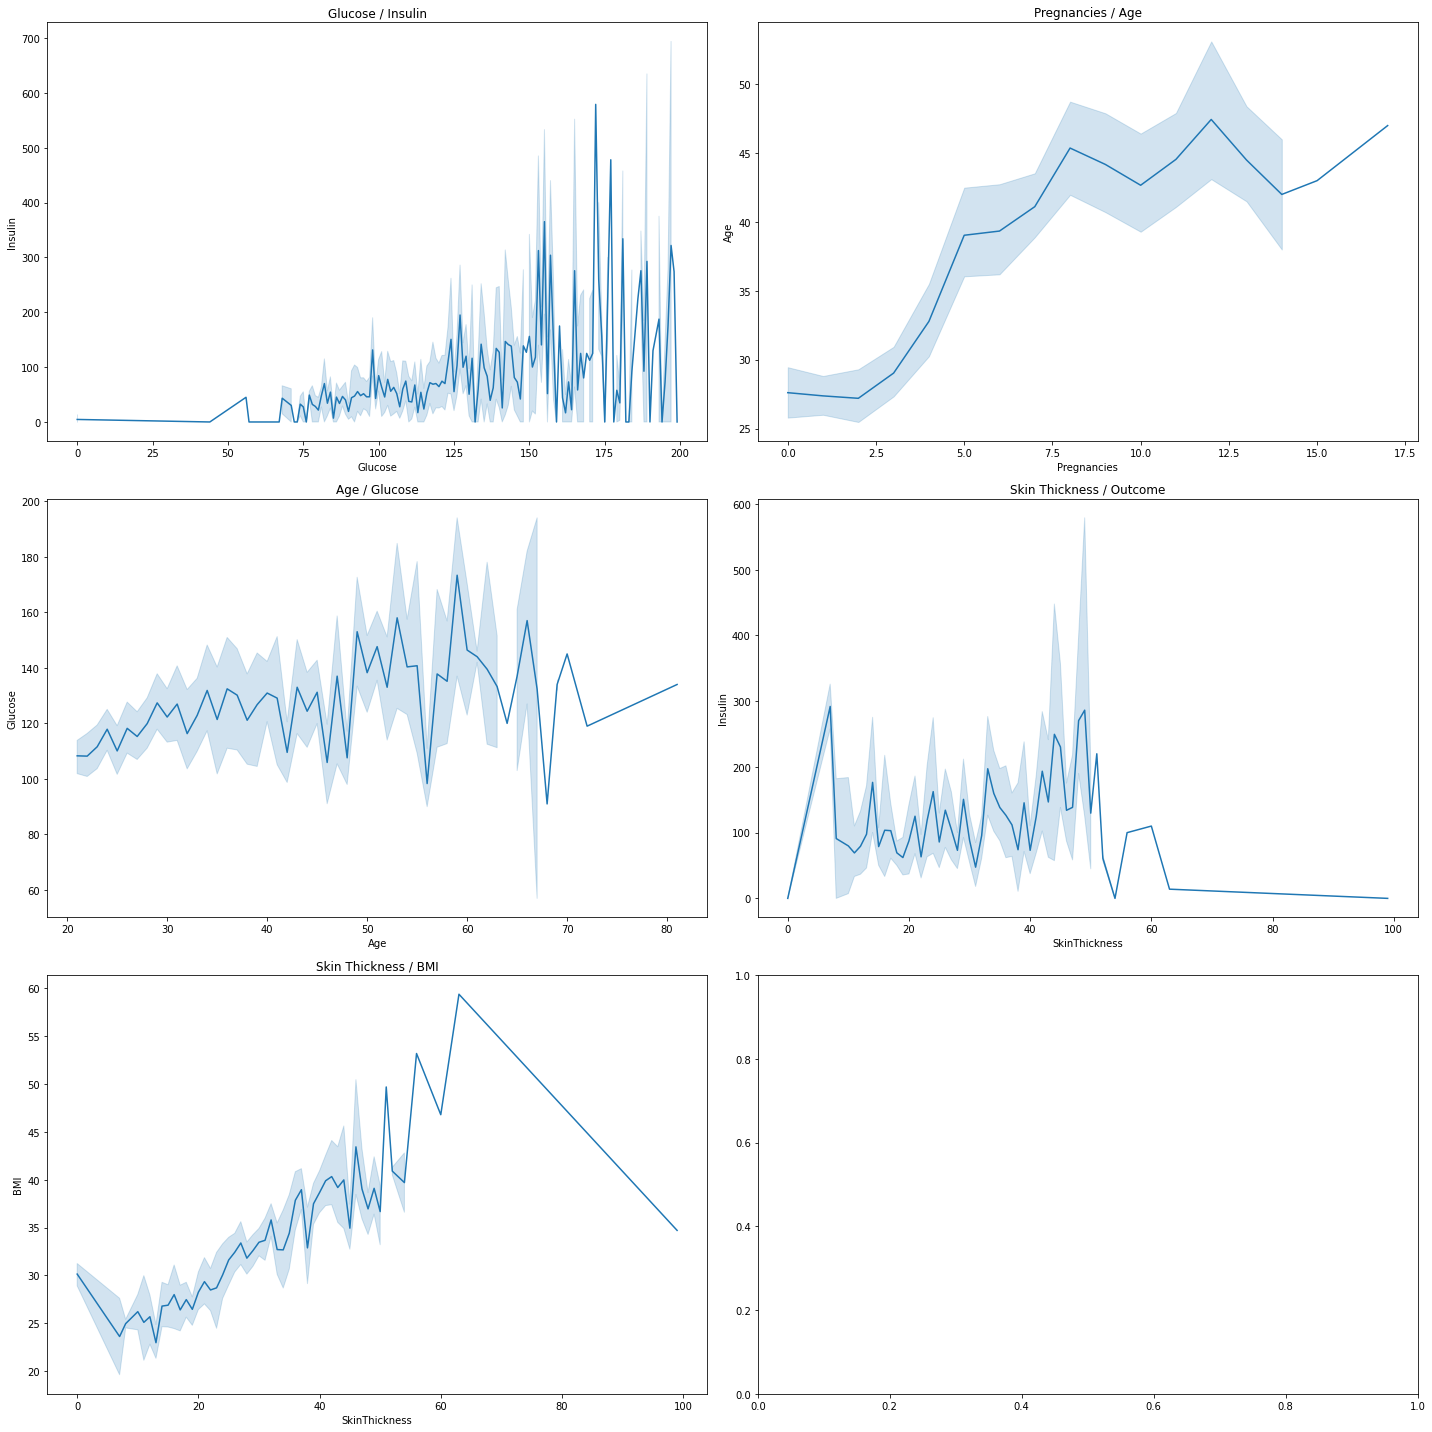

In [ ]:
linecharts_for_correlation()

In [ ]:
def histograms():
  fig, ax_histogram = plt.subplots(nrows = 3, ncols = 3, figsize = (14, 6))

  pregnancies_histogram = sns.histplot(data = diabetes["Pregnancies"], ax = ax_histogram[0][0])
  ax_histogram[0][0].set_title("Pregnancies / Outcome")
  pregnancies_histogram.tick_params(axis = "x")

  glucose_histogram = sns.histplot(data = diabetes["Glucose"], ax = ax_histogram[0][1])
  ax_histogram[0][1].set_title("Glucose / Outcome")
  glucose_histogram.tick_params(axis = "x")
  
  blood_pressure_histogram = sns.histplot(data = diabetes["BloodPressure"], ax = ax_histogram[0][2])
  ax_histogram[0][2].set_title("Blood Pressure / Outcome")
  blood_pressure_histogram.tick_params(axis = "x")

  skin_thickness_histogram = sns.histplot(data = diabetes["SkinThickness"], ax = ax_histogram[1][0])
  ax_histogram[1][0].set_title("SkinThickness / Outcome")
  skin_thickness_histogram.tick_params(axis = "x")

  insulin_histogram = sns.histplot(data = diabetes["Insulin"], ax = ax_histogram[1][1])
  ax_histogram[1][1].set_title("Insulin / Outcome")
  insulin_histogram.tick_params(axis = "x")

  bmi_histogram = sns.histplot(data = diabetes["BMI"], ax = ax_histogram[1][2])
  ax_histogram[1][2].set_title("BMI / Outcome")
  bmi_histogram.tick_params(axis = "x")

  dpf_histogram = sns.histplot(data = diabetes["DiabetesPedigreeFunction"], ax = ax_histogram[2][0])
  ax_histogram[2][0].set_title("DiabetesPedigreeFunction / Outcome")
  dpf_histogram.tick_params(axis = "x")

  age_histogram = sns.histplot(data = diabetes["Age"], ax = ax_histogram[2][1])
  ax_histogram[2][1].set_title("Age / Outcome")
  age_histogram.tick_params(axis = "x")

  fig.tight_layout()
  plt.show()

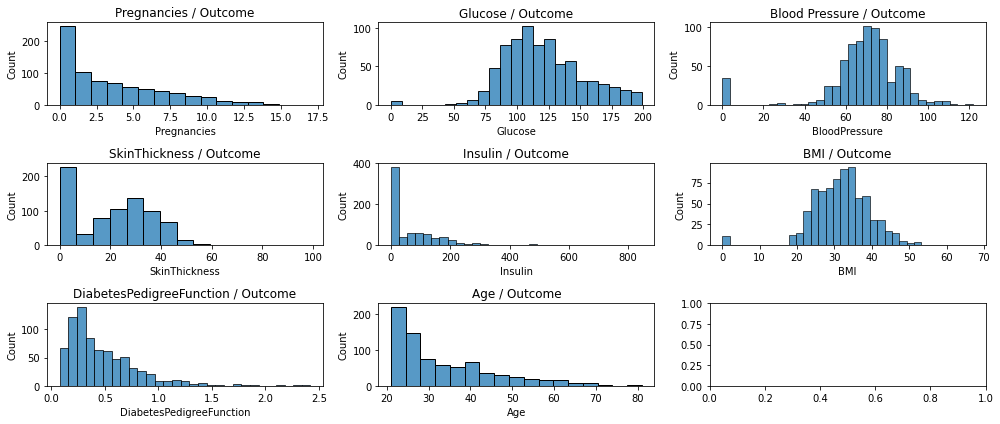

In [ ]:
histograms()

In [ ]:
def scatterplots():
  fig, ax_scatter = plt.subplots(nrows = 3, ncols = 3, figsize = (14, 6))

  pregnancies_scatter = sns.scatterplot(x = diabetes["Pregnancies"], y = diabetes["Outcome"], data = diabetes, ax = ax_scatter[0][0])
  ax_scatter[0][0].set_title("Pregnancy Scatter")
  pregnancies_scatter.tick_params(axis = "x")

  glucose_scatter = sns.scatterplot(x = diabetes["Glucose"], y = diabetes["Outcome"], data = diabetes, ax = ax_scatter[0][1])
  ax_scatter[0][1].set_title("Glucose Scatter")
  glucose_scatter.tick_params(axis = "x")

  blood_pressure_scatter = sns.scatterplot(x = diabetes["BloodPressure"], y = diabetes["Outcome"], data = diabetes, ax = ax_scatter[0][2])
  ax_scatter[0][2].set_title("Blood Pressure Scatter")
  blood_pressure_scatter.tick_params(axis = "x")

  skin_thickness_scatter = sns.scatterplot(x = diabetes["SkinThickness"], y = diabetes["Outcome"], data = diabetes, ax = ax_scatter[1][0])
  ax_scatter[1][0].set_title("SkinThickness")
  skin_thickness_scatter.tick_params(axis = "x")

  insulin_scatter = sns.scatterplot(x = diabetes["Insulin"], y = diabetes["Outcome"], data = diabetes, ax = ax_scatter[1][1])
  ax_scatter[1][1].set_title("Insulin")
  insulin_scatter.tick_params(axis = "x")

  bmi_scatter = sns.scatterplot(x = diabetes["BMI"], y = diabetes["Outcome"], data = diabetes, ax = ax_scatter[1][2])
  ax_scatter[1][2].set_title("BMI")
  bmi_scatter.tick_params(axis = "x") 

  dpf_scatter = sns.scatterplot(x = diabetes["DiabetesPedigreeFunction"], y = diabetes["Outcome"], ax = ax_scatter[2][0])
  ax_scatter[2][0].set_title("Diabetes Pedigree Function Scatter")
  dpf_scatter.tick_params(axis = "x")

  age_scatter = sns.scatterplot(x = diabetes["Age"], y = diabetes["Outcome"], ax = ax_scatter[2][1])
  ax_scatter[2][1].set_title("Age")
  age_scatter.tick_params(axis = "x")  

  fig.tight_layout()
  plt.show()

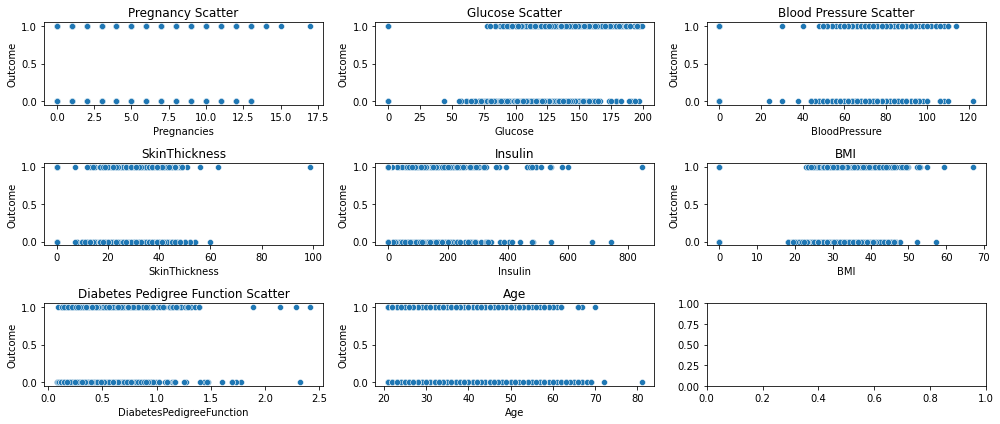

In [ ]:
scatterplots()

In [ ]:
def regplot():
  fig, ax_reg = plt.subplots(nrows = 3, ncols = 2, figsize = (14, 6))

  glucose_to_insulin_regplot = sns.regplot(x = "Glucose", y = "Insulin", data = diabetes, ax = ax_reg[0][0])
  ax_reg[0][0].set_title("Glucose to Insulin")

  pregnancies_to_age_regplot = sns.regplot(x = "Pregnancies", y = "Age", data = diabetes, ax = ax_reg[0][1])
  ax_reg[0][1].set_title("Pregnancies to Age")

  glucose_to_outcome_regplot = sns.regplot(x = "Age", y = "Glucose", data = diabetes, ax = ax_reg[1][0])
  ax_reg[1][0].set_title("Age to Glucose")

  skin_thickness_to_insulin_regplot = sns.regplot(x = "SkinThickness", y = "Insulin", data = diabetes, ax = ax_reg[1][1])
  ax_reg[1][1].set_title("SkinThickness to Insulin")

  skin_thickness_to_bmi_regplot = sns.regplot(x = "SkinThickness", y = "BMI", data = diabetes, ax = ax_reg[2][0])
  ax_reg[2][0].set_title("SkinThickness to BMI")

  fig.tight_layout()
  plt.show()

  #Try others that make sense - glucose to insulin, pregnancies and age, glucose and outcome, age and glucose, skin thickness and insulin, skin thickness and bmi

  #glucose_to_insulin

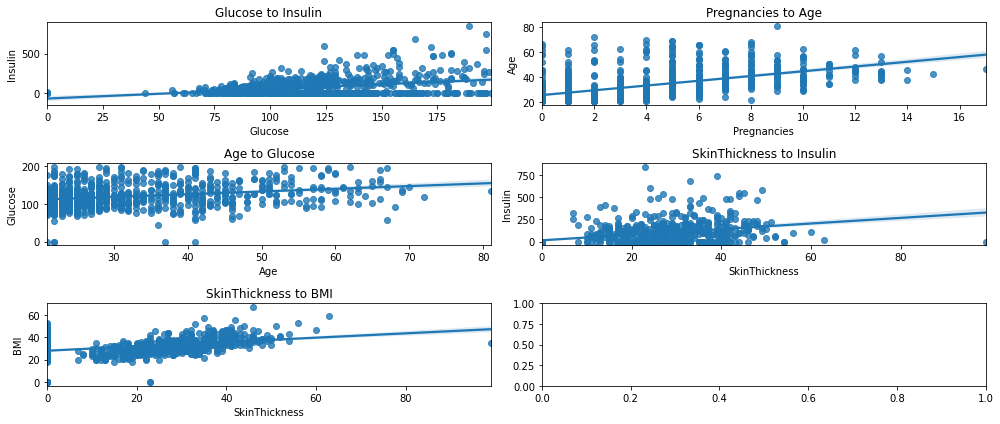

In [ ]:
regplot()

In [ ]:
def distplots():
  fig, ax_distplots = plt.subplots(nrows = 3, ncols = 3, figsize = (14, 6))
  pregnancies_distplot = sns.distplot(diabetes["Pregnancies"], ax = ax_distplots[0][0])

  glucose_distplot = sns.distplot(diabetes["Glucose"], ax = ax_distplots[0][1])

  blood_pressure_distplot = sns.distplot(diabetes["BloodPressure"], ax = ax_distplots[0][2])

  skin_thickness_distplot = sns.distplot(diabetes["SkinThickness"], ax = ax_distplots[1][0])

  insulin_distplot = sns.distplot(diabetes["Insulin"], ax = ax_distplots[1][1])

  bmi_distplot = sns.distplot(diabetes["BMI"], ax = ax_distplots[1][2])

  dpf_distplot = sns.distplot(diabetes["DiabetesPedigreeFunction"], ax = ax_distplots[2][0])

  age_distplot = sns.distplot(diabetes["Age"], ax = ax_distplots[2][1])
  
  fig.tight_layout()
  plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/di

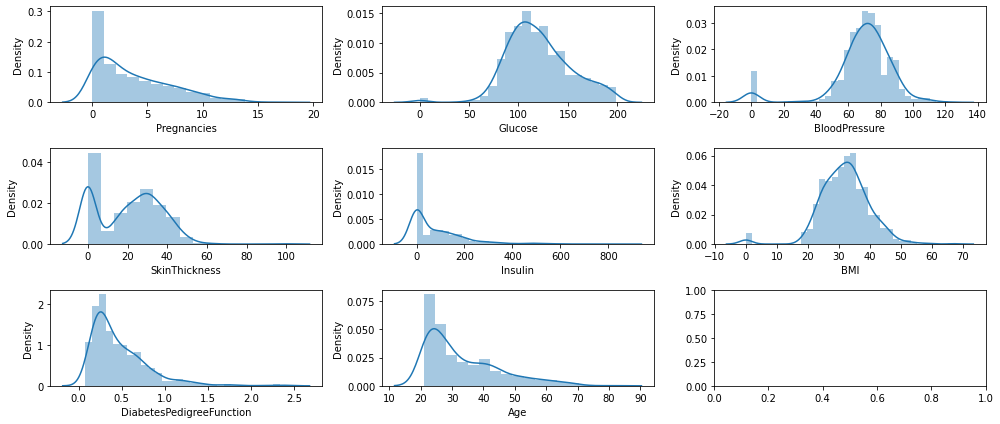

In [ ]:
distplots()

That is everything is Matplotlib and or Seaborn.  I have learn a lot about plotting, and there is definitely more but this is a great start.  Now let's try Plotly and see if we can do what we just did but in an interactive way.

In [1]:
def violins():
  """
  AD
  """
  fig_violin, ax_violin = plt.subplots(nrows = 4, ncols = 2, figsize = (20, 15))

  sns.violinplot(y = diabetes["Pregnancies"], x = diabetes["Outcome"], ax = ax_violin[0, 0])

  sns.violinplot(y = diabetes["Glucose"], x = diabetes["Outcome"], ax = ax_violin[0, 1])

  sns.violinplot(y = diabetes["BloodPressure"], x = diabetes["Outcome"], ax = ax_violin[1, 0])

  sns.violinplot(y = diabetes["SkinThickness"], x = diabetes["Outcome"], ax = ax_violin[1, 1])

  sns.violinplot(y = diabetes["Insulin"], x = diabetes["Outcome"], ax = ax_violin[2, 0])

  sns.violinplot(y = diabetes["BMI"], x = diabetes["Outcome"], ax = ax_violin[2, 1])

  sns.violinplot(y = diabetes["Age"], x = diabetes["Outcome"], ax = ax_violin[3, 0]) 

  fig_violin.tight_layout()
  plt.show()

violins()

NameError: ignored

In [ ]:
# plotly_barchart()

# Now I need to find make the plots for the correlated values

In [ ]:
def barchart_correlation():
  fig, ax_barchart_correlation = plt.subplots(nrows = 2, ncols = 3, figsize = (24, 30))

  glucose_to_insulin_barchart_correlation = sns.barplot(x = diabetes["Glucose"], y = diabetes["Insulin"], ax = ax_barchart_correlation[0][0])
  ax_barchart_correlation[0][0].set_title("Age / Outcome")
  glucose_to_insulin_barchart_correlation.set_xticklabels(glucose_to_insulin_barchart_correlation.get_xticklabels())

  pregnancies_to_age_barchart_correlation = sns.barplot(x = diabetes["Pregnancies"], y = diabetes["Age"], ax = ax_barchart_correlation[0][1])
  ax_barchart_correlation[0][1].set_title("Pregnancies / Age")
  pregnancies_to_age_barchart_correlation.set_xticklabels(pregnancies_to_age_barchart_correlation.get_xticklabels())

  age_to_glucose_barchart_correlation = sns.barplot(x = diabetes["Age"], y = diabetes["Glucose"], ax = ax_barchart_correlation[0][2])
  ax_barchart_correlation[0][2].set_title("Age / Glucose")
  age_to_glucose_barchart_correlation.set_xticklabels(age_to_glucose_barchart_correlation.get_xticklabels())

  skin_thickness_to_insulin_barchart_correlation = sns.barplot(x = diabetes["SkinThickness"], y = diabetes["Insulin"], ax = ax_barchart_correlation[1][0])
  ax_barchart_correlation[1][0].set_title("SkinThickness / Insulin")
  skin_thickness_to_insulin_barchart_correlation.set_xticklabels(skin_thickness_to_insulin_barchart_correlation.get_xticklabels())

  skin_thickness_to_bmi_barchart_correlation = sns.barplot(x = diabetes["SkinThickness"], y = diabetes["BMI"], ax = ax_barchart_correlation[1][1])
  ax_barchart_correlation[1][1].set_title("SkinThickness / Insulin")
  skin_thickness_to_bmi_barchart_correlation.set_xticklabels(skin_thickness_to_bmi_barchart_correlation.get_xticklabels())

  fig.tight_layout()
  plt.show()

  #Try others that make sense - glucose to insulin, pregnancies and age, glucose and outcome, age and glucose, skin thickness and insulin, skin thickness and bmi

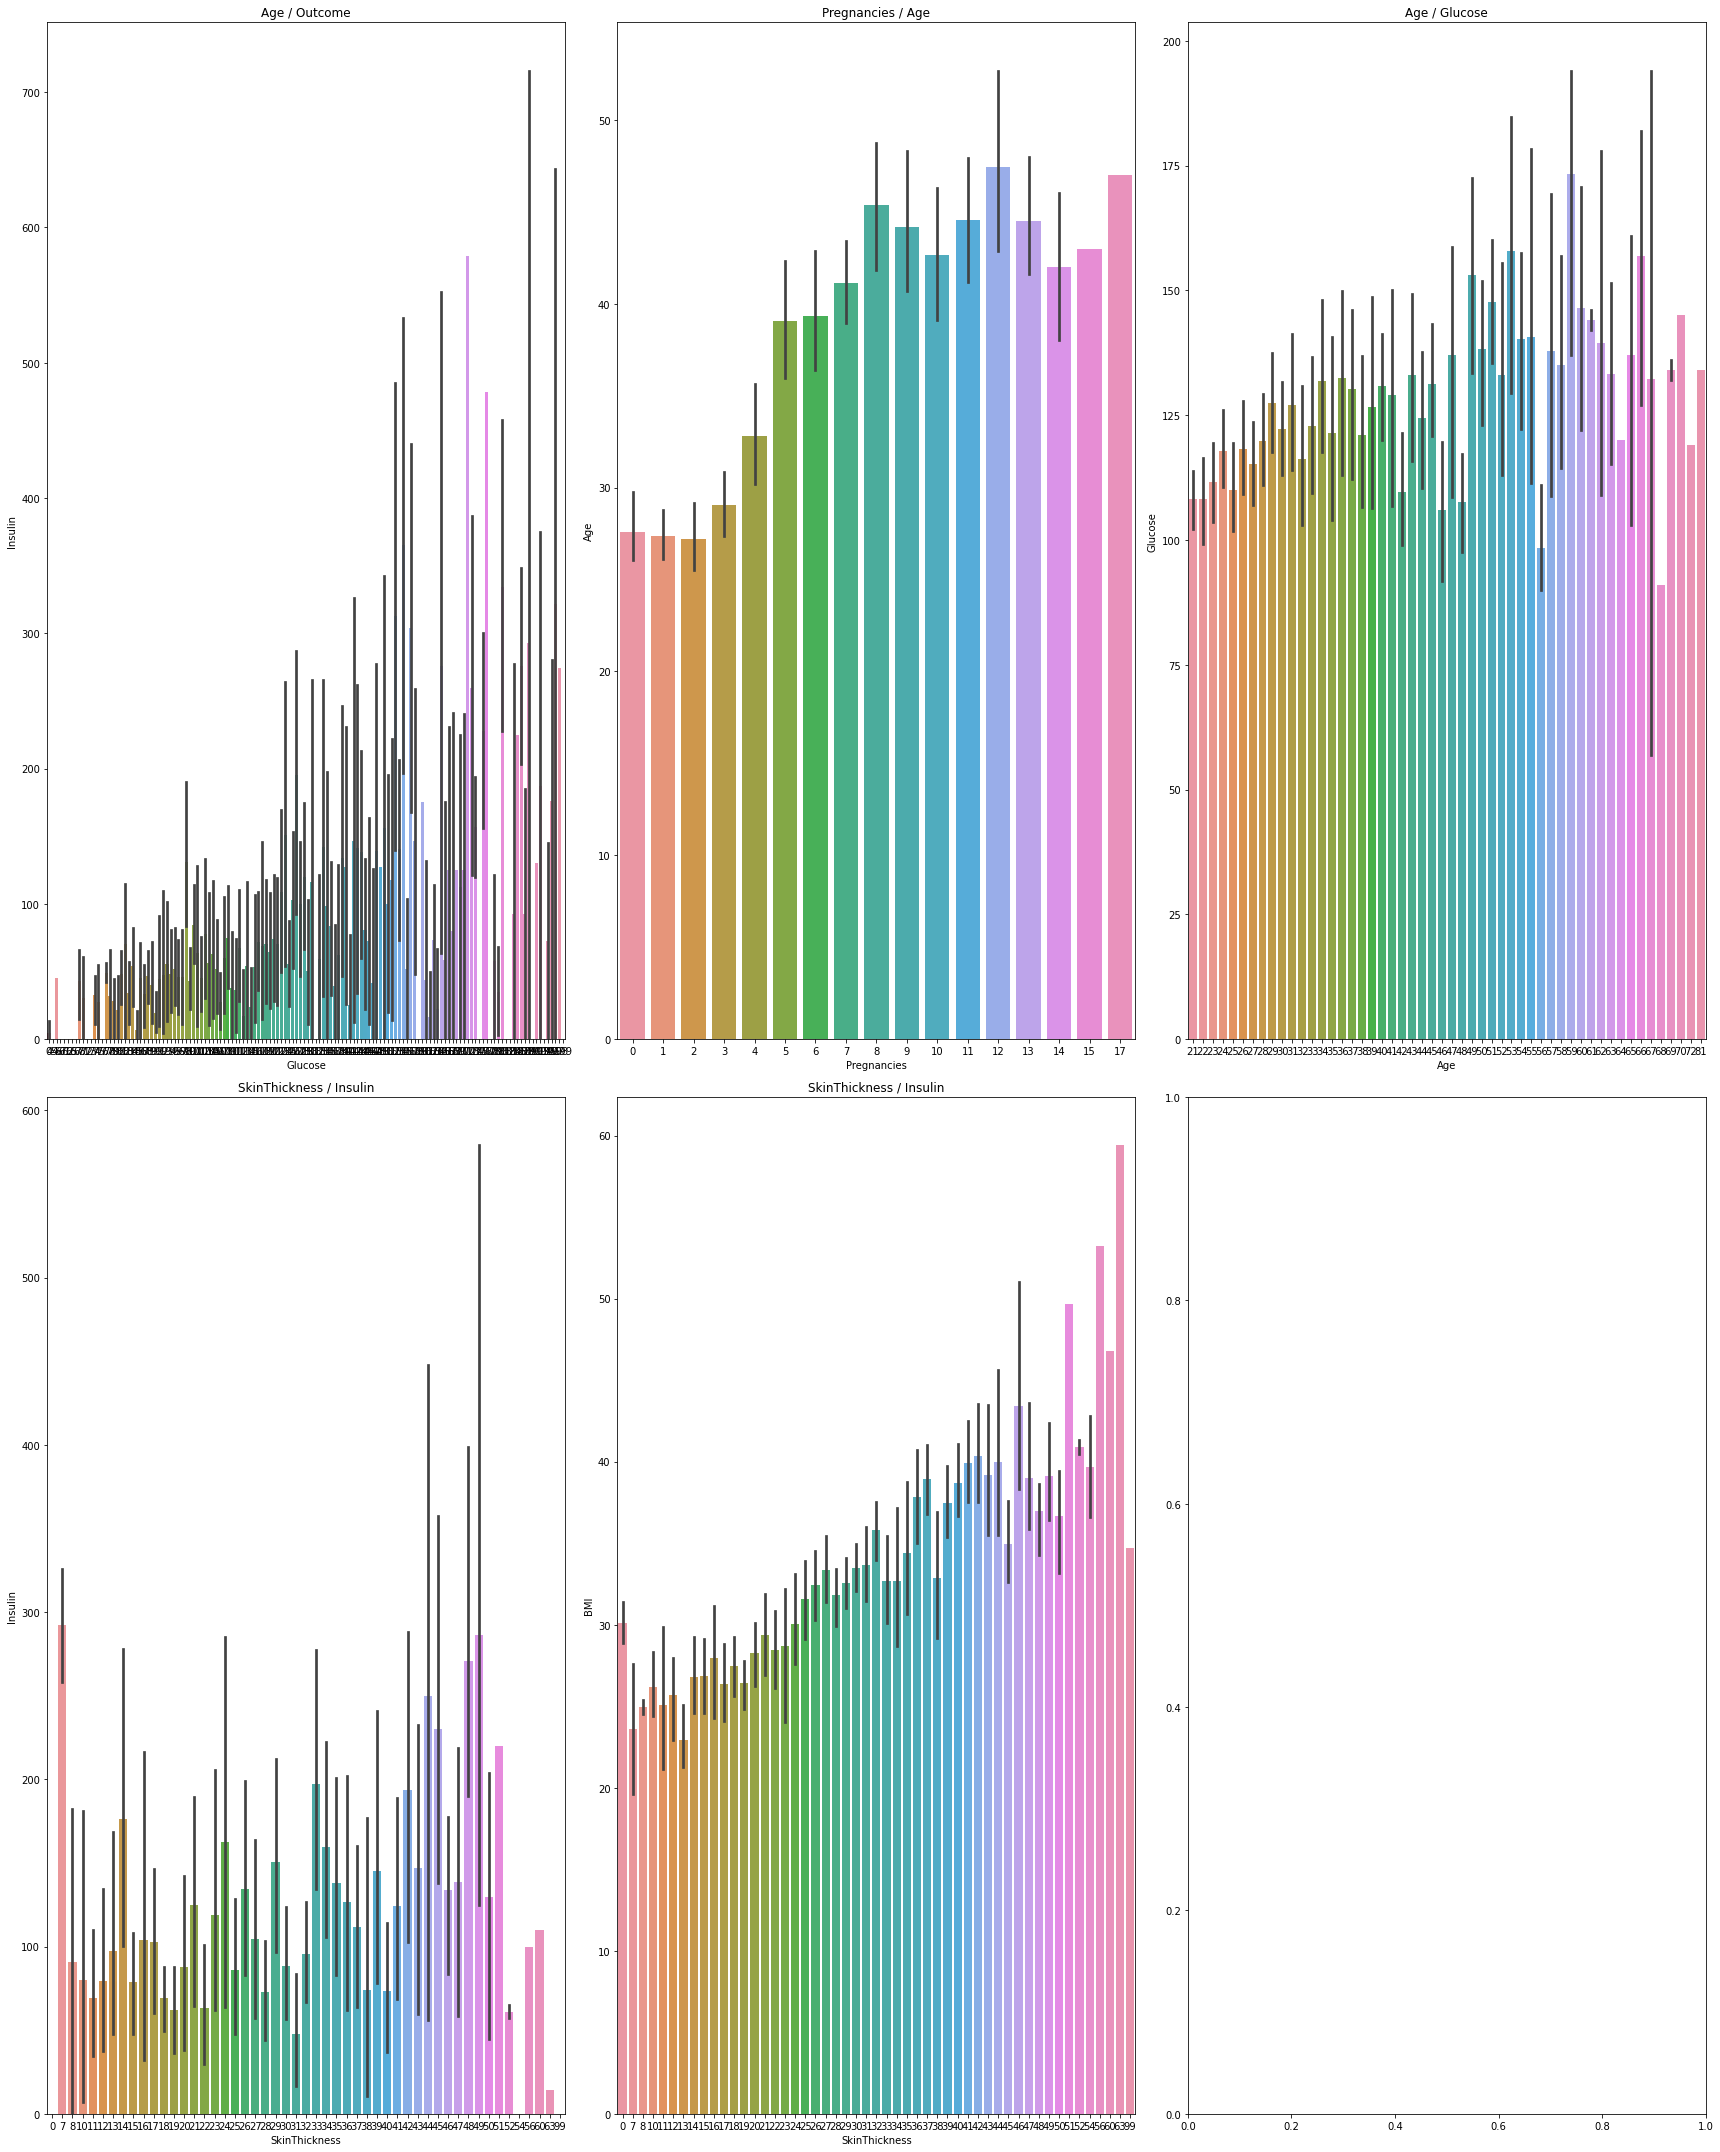

In [ ]:
barchart_correlation()

In [ ]:
def lineplots_with_correlations():
  fig, ax_lineplot_correlation = plt.subplots(nrows = 2, ncols = 3, figsize = (24, 30))

  glucose_to_insulin_lineplot_correlation = sns.lineplot(x = diabetes["Glucose"], y = diabetes["Insulin"], ax = ax_lineplot_correlation[0][0])
  ax_lineplot_correlation[0][0].set_title("Age / Outcome")
  glucose_to_insulin_lineplot_correlation.set_xticklabels(glucose_to_insulin_lineplot_correlation.get_xticklabels())

  pregnancies_to_age_lineplot_correlation = sns.lineplot(x = diabetes["Pregnancies"], y = diabetes["Age"], ax = ax_lineplot_correlation[0][1])
  ax_lineplot_correlation[0][1].set_title("Pregnancies / Age")
  pregnancies_to_age_lineplot_correlation.set_xticklabels(pregnancies_to_age_lineplot_correlation.get_xticklabels())

  age_to_glucose_lineplot_correlation = sns.lineplot(x = diabetes["Age"], y = diabetes["Glucose"], ax = ax_lineplot_correlation[0][2])
  ax_lineplot_correlation[0][2].set_title("Age / Glucose")
  age_to_glucose_lineplot_correlation.set_xticklabels(age_to_glucose_lineplot_correlation.get_xticklabels())

  skin_thickness_to_insulin_lineplot_correlation = sns.lineplot(x = diabetes["SkinThickness"], y = diabetes["Insulin"], ax = ax_lineplot_correlation[1][0])
  ax_lineplot_correlation[1][0].set_title("SkinThickness / Insulin")
  skin_thickness_to_insulin_lineplot_correlation.set_xticklabels(skin_thickness_to_insulin_lineplot_correlation.get_xticklabels())

  skin_thickness_to_bmi_lineplot_correlation = sns.lineplot(x = diabetes["SkinThickness"], y = diabetes["BMI"], ax = ax_lineplot_correlation[1][1])
  ax_lineplot_correlation[1][1].set_title("SkinThickness / Insulin")
  skin_thickness_to_bmi_lineplot_correlation.set_xticklabels(skin_thickness_to_bmi_lineplot_correlation.get_xticklabels())

  fig.tight_layout()
  plt.show()

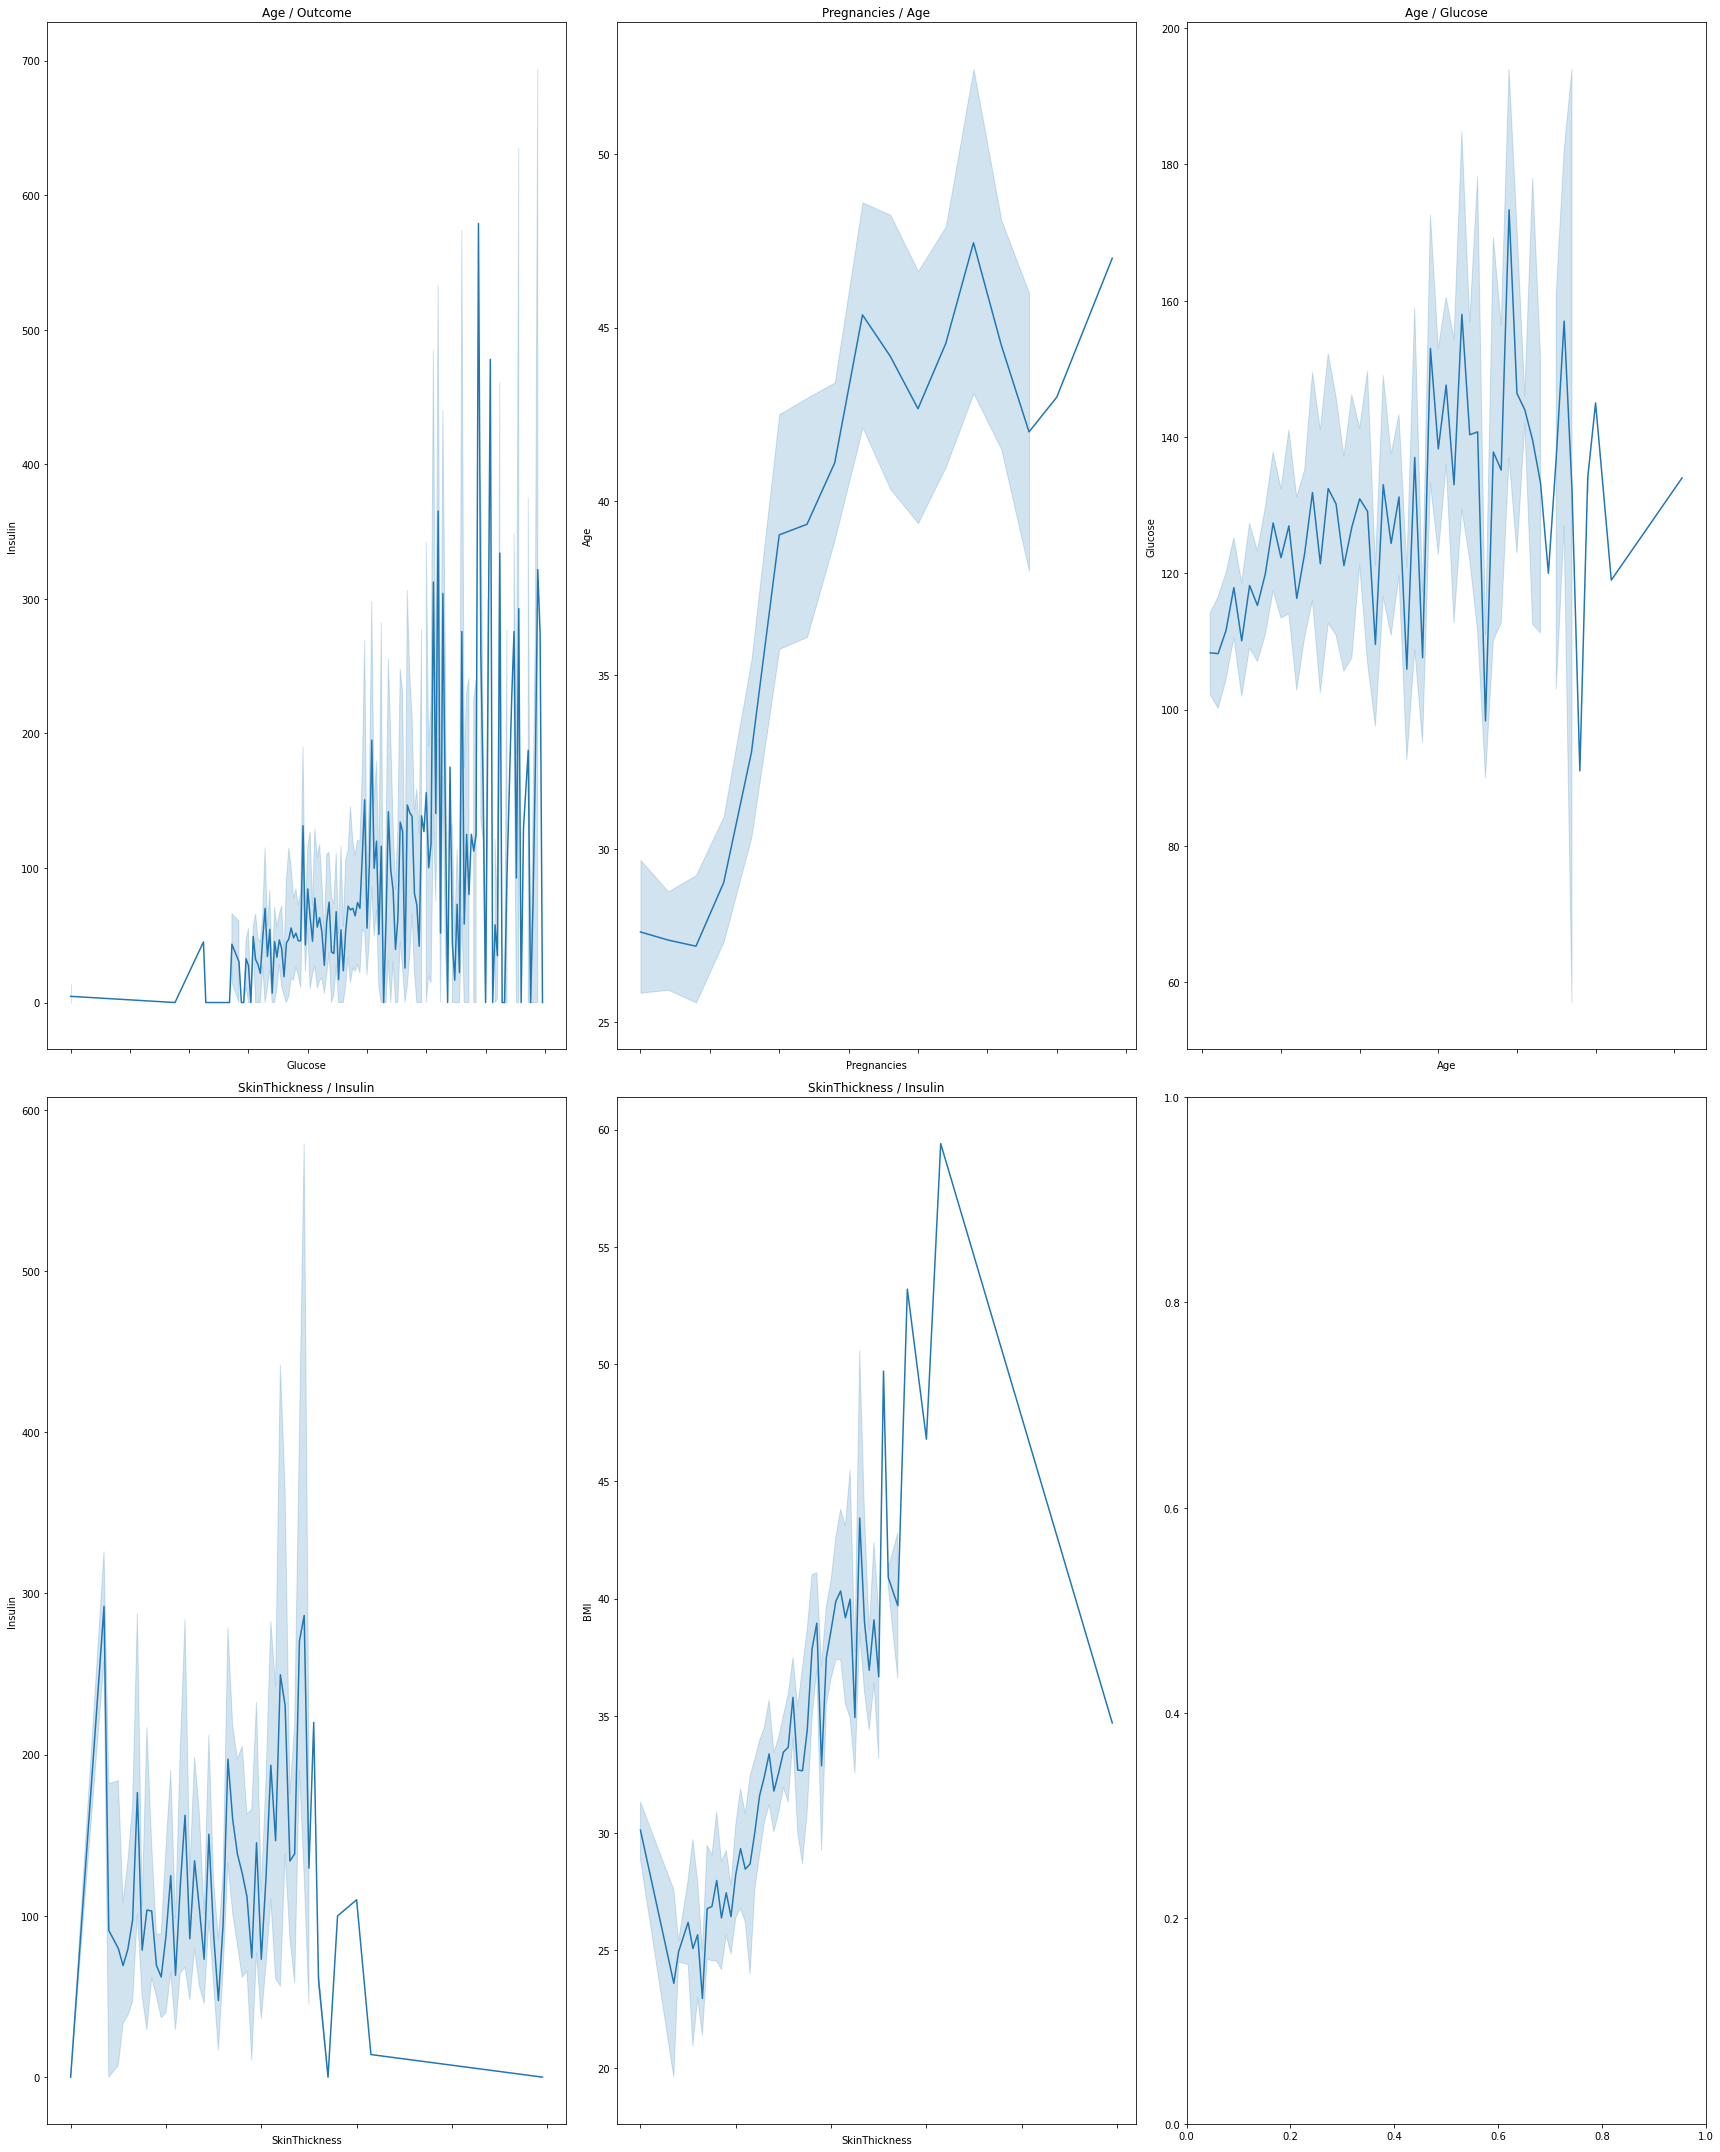

In [ ]:
lineplots_with_correlations()

#What do we need to standardize and normalize?



In [ ]:
#We can try a tree method almost immediately since it is insensitive to scale
from sklearn import preprocessing

diabetes_normalized = diabetes.copy()

column = 'Pregnancies'
diabetes_normalized[column] = diabetes_normalized[column] / diabetes[column].abs().max() 

column = 'Glucose'
diabetes_normalized[column] = diabetes_normalized[column] / diabetes[column].abs().max() 

column = 'BloodPressure'
diabetes_normalized[column] = diabetes_normalized[column] / diabetes[column].abs().max() 

column = 'SkinThickness'
diabetes_normalized[column] = diabetes_normalized[column] / diabetes[column].abs().max() 

column = 'Insulin'
diabetes_normalized[column] = diabetes_normalized[column] / diabetes[column].abs().max() 

column = 'BMI'
diabetes_normalized[column] = diabetes_normalized[column] / diabetes[column].abs().max() 

column = 'Age'
diabetes_normalized[column] = diabetes_normalized[column] / diabetes[column].abs().max() 

column = 'DiabetesPedigreeFunction'
diabetes_normalized[column] = diabetes_normalized[column] / diabetes[column].abs().max() 


print(diabetes_normalized.head())

   Pregnancies   Glucose  ...       Age  Outcome
0     0.352941  0.743719  ...  0.617284        1
1     0.058824  0.427136  ...  0.382716        0
2     0.470588  0.919598  ...  0.395062        1
3     0.058824  0.447236  ...  0.259259        0
4     0.000000  0.688442  ...  0.407407        1

[5 rows x 9 columns]


#Let's Build a Model!

In [ ]:
diabetes_normalized.isna().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

#What do we need to impute now?  Are there missing data?  Are the classes balanced?  How do we balance them?

In [ ]:
#Random Forrest Time

'''
Split the data into train and test
'''

def splitting_data_into_train_and_test_with_normalized():
  # length_of_dataframe = len(diabetes_normalized)
  # x_train_size = int(length_of_dataframe * .8) # I have my split of 80% and 20% for training and testing

  x_normalized = diabetes_normalized.drop("Outcome", axis = 1)
  y_normalized = diabetes_normalized["Outcome"]

  x_train_normalized, x_test_normalized, y_train_normalized, y_test_normalized = train_test_split(x_normalized, y_normalized, test_size = 0.2)
  
  return x_train_normalized, x_test_normalized, y_train_normalized, y_test_normalized

def splitting_data_into_train_and_test_without_normalized():
  x_without_normalizing = diabetes.drop("Outcome", axis = 1)
  y_without_normalizing = diabetes["Outcome"]

  x_train_without_normalizing, x_test_without_normalizing, y_train_without_normalizing, y_test_without_normalizing = train_test_split(x_without_normalizing, y_without_normalizing, test_size = 0.2)

  return x_train_without_normalizing, x_test_without_normalizing, y_train_without_normalizing, y_test_without_normalizing


In [ ]:
def grid_without_normalized():
  x_train, x_test, y_train, y_test = splitting_data_into_train_and_test_without_normalized()

  rfc_1 = RandomForestClassifier()

  param_grid = {
      "n_estimators": [1, 5000],
      "max_features": ["auto", "sqrt", "log2"],
      "max_depth"   : [1, 2, 3, 4, 5],
      "criterion"   : ["gini", "entropy"]
  }

  cv_rf_1 = GridSearchCV(estimator = rfc_1, param_grid = param_grid, cv = 5)
  cv_rf_1.fit(x_train, y_train)
  print(cv_rf_1.best_params_)

  #Change this to the best params
  rf_c1 = RandomForestClassifier(max_features = "auto", n_estimators = 5000, max_depth = 5, criterion = "gini")
  rf_c1.fit(x_train, y_train)
  pred = rf_c1.predict(x_test)
  print("Accuracy for Random Forest on CV_1 data: ", accuracy_score(y_test, pred))
  print("Mean Absolute Error of CV_1: ", mean_absolute_error(y_test, pred))
  return rf_c1

def grid_with_normalized():
  x_train_with_normal, x_test_with_normal, y_train_with_normal, y_test_with_normal = splitting_data_into_train_and_test_with_normalized()

  rfc_2 = RandomForestClassifier()

  param_grid = {
      "n_estimators": [1, 5000],
      "max_features": ["auto", "sqrt", "log2"],
      "max_depth"   : [1, 2, 3, 4, 5],
      "criterion"   : ["gini", "entropy"]
  }

  cv_rf_2 = GridSearchCV(estimator = rfc_2, param_grid = param_grid, cv = 5)
  cv_rf_2.fit(x_train_with_normal, y_train_with_normal)
  print(cv_rf_2.best_params_)

  #Change this to the best params
  rf_c2 = RandomForestClassifier(max_features = "auto", n_estimators = 5000, max_depth = 3, criterion = "gini")
  rf_c2.fit(x_train_with_normal, y_train_with_normal)
  pred_2 = rf_c2.predict(x_test_with_normal)
  print("Accuracy for Random Forest on CV_2 data: ", accuracy_score(y_test_with_normal, pred_2))  
  print("Mean Absoulte Error of CV_2: ", mean_absolute_error(y_test_with_normal, pred_2))
  return rf_c2

In [ ]:
model_1_without_normalization = grid_without_normalized()

{'criterion': 'gini', 'max_depth': 5, 'max_features': 'sqrt', 'n_estimators': 5000}
Accuracy for Random Forest on CV_1 data:  0.7532467532467533
Mean Absolute Error of CV_1:  0.24675324675324675


In [ ]:
model_2_with_normalization = grid_with_normalized()

{'criterion': 'gini', 'max_depth': 5, 'max_features': 'log2', 'n_estimators': 5000}
Accuracy for Random Forest on CV_2 data:  0.7207792207792207
Mean Absoulte Error of CV_2:  0.2792207792207792


In [ ]:
def evaluate_random_forest_with_normalized():
  x_train_with_normalization, x_test_with_normalization, y_train_with_normalization, y_test_with_normalization = splitting_data_into_train_and_test_with_normalized()

  trained_tree = RandomForestClassifier()
  trained_tree.fit(x_train_with_normalization, y_train_with_normalization)
  random_forest_predictions = trained_tree.predict(x_test_with_normalization)

  accuracy = accuracy_score(y_test_with_normalization, random_forest_predictions)
  mae = mean_absolute_error(y_test_with_normalization, random_forest_predictions)
  print("Accuracy with normalization:    ", accuracy, "Mean Absolute Error: ", mae)


evaluate_random_forest_with_normalized()

Accuracy with normalization:     0.7532467532467533 Mean Absolute Error:  0.24675324675324675


In [ ]:
def evaluate_random_forrest_without_normalized():
  x_train_without_normalization, x_test_without_normalization, y_train_without_normalization, y_test_without_normalization = splitting_data_into_train_and_test_without_normalized()

  random_forest_without_norm = RandomForestClassifier(n_estimators = 100)

  trained_tree_without_norm = random_forest_without_norm.fit(x_train_without_normalization, y_train_without_normalization)

  random_forest_predictions = trained_tree_without_norm.predict(x_test_without_normalization)

  accuracy = accuracy_score(y_test_without_normalization, random_forest_predictions)
  mae = mean_absolute_error(y_test_without_normalization, random_forest_predictions)
  print("Accuracy without normalization: ", accuracy, "Mean Absolute Error: ", mae)

evaluate_random_forrest_without_normalized()

Accuracy without normalization:  0.7467532467532467 Mean Absolute Error:  0.2532467532467532


In [ ]:
evaluate_random_forest_without_normalized()

In [ ]:
def xgboost_model():
  import xgboost as xgb
  # read in data

  dtrain = xgb.DMatrix('demo/data/agaricus.txt.train')
  dtest = xgb.DMatrix('demo/data/agaricus.txt.test')
  # specify parameters via map

  param = {'max_depth':2, 'eta':1, 'objective':'binary:logistic' }
  num_round = 2
  bst = xgb.train(param, dtrain, num_round)
  # make prediction
  preds = bst.predict(dtest)
  

In [ ]:
def create_dataset(xs, ys, n_classes=10):
  ys = tf.one_hot(ys, depth=n_classes)
  return tf.data.Dataset.from_tensor_slices((xs, ys)).shuffle(len(ys)).batch(128)


def dense():
  from sklearn.preprocessing import StandardScaler


  x_value = diabetes_normalized[["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age"]]
  y_value = diabetes_normalized["Outcome"]

  x_value_train = x_value[:614]
  y_value_train = y_value[:614]

  #x_value_train_and_y_value_train = x_value_train.concat(y_value_train)
  

  train_data = diabetes_normalized[:614]
  test_data = diabetes_normalized[:614]

  INPUT_SHAPE = (614, 9)

  model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(614, input_shape = (614,), activation='relu'),
    tf.keras.layers.Dense(32, activation = "relu"),
    tf.keras.layers.Dense(1, activation = "sigmoid")
  ])
  
  model.compile(optimizer = tf.keras.optimizers.Adam(0.0001),
                loss = "binary_crossentropy",
                metrics = ["accuracy"])
  
  
  history = model.fit(diabetes_normalized.head(614),            
                      batch_size = 32,
                      epochs = 1000,
                      shuffle = True,
                     )
  return history


In [ ]:
dense_model = dense()

Epoch 1/1000


ValueError: ignored

In [ ]:
def checking_data():
  pd.set_option('display.max_columns', None)
  pd.set_option('display.max_rows', None)

  #print(diabetes_normalized.head(len(diabetes_normalized)))

  train_data = diabetes_normalized[:614]
  print(train_data)

  test_data = diabetes_normalized[614:]
  print(test_data)

checking_data()

     Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0       0.352941  0.743719       0.590164       0.353535  0.000000  0.500745   
1       0.058824  0.427136       0.540984       0.292929  0.000000  0.396423   
2       0.470588  0.919598       0.524590       0.000000  0.000000  0.347243   
3       0.058824  0.447236       0.540984       0.232323  0.111111  0.418778   
4       0.000000  0.688442       0.327869       0.353535  0.198582  0.642325   
5       0.294118  0.582915       0.606557       0.000000  0.000000  0.381520   
6       0.176471  0.391960       0.409836       0.323232  0.104019  0.461997   
7       0.588235  0.577889       0.000000       0.000000  0.000000  0.526080   
8       0.117647  0.989950       0.573770       0.454545  0.641844  0.454545   
9       0.470588  0.628141       0.786885       0.000000  0.000000  0.000000   
10      0.235294  0.552764       0.754098       0.000000  0.000000  0.560358   
11      0.588235  0.844221       0.60655

In [ ]:
columns = [diabetes.columns]
columns

##What do to before we model

- Standarizing
  - Standardize glucose
  - Standardize bmi
- Refactor
  - Take the colab and use a clone to edit and work on my loops for the plots to reduce the sheer amount of code.

#What did I learn?
  - The big background check function is great
  - Use correlations and heatmaps first to develop intuition behind our data and then use that to build charts instead of charts first